# Подбор по сетке параметров нейросети для предсказания параметра "соотношение матрица-наполнитель" 2

Предобработка

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
#директория проекта
#diraddr = 'C:/Users/leleg/OneDrive/data_science_course/_вкр/project/'
diraddr = 'C:/Users/busyen/OneDrive/data_science_course/_вкр/project/'

In [3]:
#загрузить подготовленные данные
df = pd.read_csv(diraddr + 'data/processed/df_no_outliers.csv')
df.drop(columns=['Unnamed: 0'],inplace = True)

In [4]:
#стандартизация
scaler = StandardScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df))
df.rename(columns={
    0:'UN',
    1:'ShN',
    2:'PN',
    3:'SMN',
    4:'P',
    5:'MU',
    6:'KO',
    7:'SEG',
    8:'TV',
    9:'PP',
    10:'MUR',
    11:'PR',
    12:'PS'
}, inplace = True)
#df.describe().T

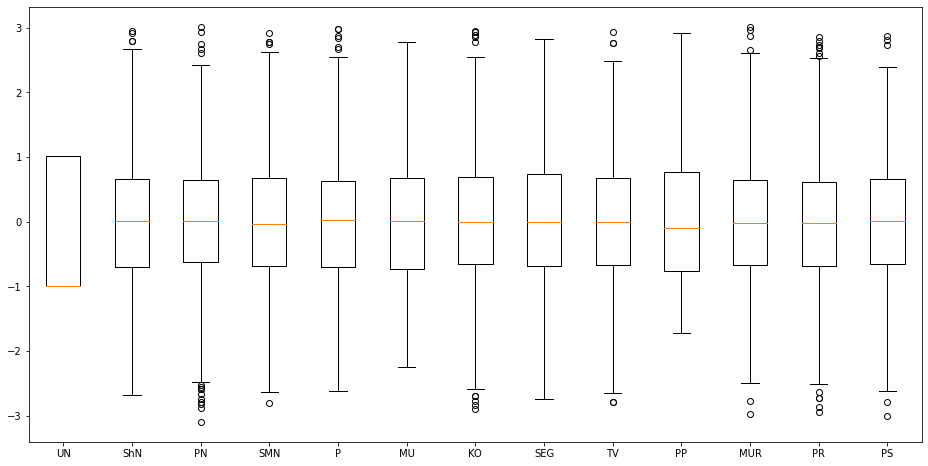

In [5]:
#вывод ящиков
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.boxplot(df, labels = df.columns)
plt.show()

In [6]:
#преобразовать в массивы
x = np.array(df.drop(columns=['SMN','MUR','PR',]))
y = np.array(df.drop(columns=['UN','ShN','PN','P','MU','KO','SEG','TV','PP','MUR','PR','PS']))

In [7]:
#разделить оба массива на train и test 70 на 30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((700, 10), (300, 10), (700, 1), (300, 1))

Grid Search

In [9]:
#поиск по сетке с дефолтными параметрами
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
param_list = {'hidden_layer_sizes': [(1,),(2,),(3,),(5,),(10,),(50,),(100,),(500,),(1000,),(100,),(100,100),(100,100,100),(100,100,100,100),(100,100,100,100,100)],
             'activation': ['logistic'],
                 'solver': ['sgd'],
             'alpha': [0.0001],
             'max_iter': [1000],
             'verbose': [1]}
regr = GridSearchCV(MLPRegressor(), param_list, cv = 10, verbose = 1).fit(x_train, y_train)
regr.predict(x_test)
regr.score(x_test, y_test)

Fitting 10 folds for each of 14 candidates, totalling 140 fits
Iteration 1, loss = 0.65569251
Iteration 2, loss = 0.64930435
Iteration 3, loss = 0.63971123
Iteration 4, loss = 0.62917353
Iteration 5, loss = 0.61822978
Iteration 6, loss = 0.60757199
Iteration 7, loss = 0.59714462
Iteration 8, loss = 0.58757453
Iteration 9, loss = 0.57862172
Iteration 10, loss = 0.57067767
Iteration 11, loss = 0.56338223
Iteration 12, loss = 0.55691888
Iteration 13, loss = 0.55108267
Iteration 14, loss = 0.54591475
Iteration 15, loss = 0.54123423
Iteration 16, loss = 0.53680032
Iteration 17, loss = 0.53318319
Iteration 18, loss = 0.52950259
Iteration 19, loss = 0.52628029
Iteration 20, loss = 0.52369794
Iteration 21, loss = 0.52123716
Iteration 22, loss = 0.51928714
Iteration 23, loss = 0.51751085
Iteration 24, loss = 0.51589385
Iteration 25, loss = 0.51430681
Iteration 26, loss = 0.51279791
Iteration 27, loss = 0.51166590
Iteration 28, loss = 0.51047410
Iteration 29, loss = 0.50955729
Iteration 30, loss

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 39, loss = 0.50398803
Iteration 40, loss = 0.50365467
Iteration 41, loss = 0.50341218
Iteration 42, loss = 0.50315219
Iteration 43, loss = 0.50295787
Iteration 44, loss = 0.50282996
Iteration 45, loss = 0.50275717
Iteration 46, loss = 0.50269090
Iteration 47, loss = 0.50263073
Iteration 48, loss = 0.50257966
Iteration 49, loss = 0.50245969
Iteration 50, loss = 0.50241750
Iteration 51, loss = 0.50236861
Iteration 52, loss = 0.50234063
Iteration 53, loss = 0.50232129
Iteration 54, loss = 0.50230336
Iteration 55, loss = 0.50227709
Iteration 56, loss = 0.50225452
Iteration 57, loss = 0.50223115
Iteration 58, loss = 0.50221804
Iteration 59, loss = 0.50219406
Iteration 60, loss = 0.50218326
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.55700603
Iteration 2, loss = 0.55574354
Iteration 3, loss = 0.55359779
Iteration 4, loss = 0.55136499
Iteration 5, loss = 0.54895488
Iteration 6, loss = 0.54661772
Iteration 7, loss =

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 15, loss = 0.61322768
Iteration 16, loss = 0.60408717
Iteration 17, loss = 0.59538215
Iteration 18, loss = 0.58749578
Iteration 19, loss = 0.58011003
Iteration 20, loss = 0.57375972
Iteration 21, loss = 0.56832822
Iteration 22, loss = 0.56347109
Iteration 23, loss = 0.55915903
Iteration 24, loss = 0.55492675
Iteration 25, loss = 0.55118572
Iteration 26, loss = 0.54763590
Iteration 27, loss = 0.54441583
Iteration 28, loss = 0.54160501
Iteration 29, loss = 0.53887689
Iteration 30, loss = 0.53672808
Iteration 31, loss = 0.53459459
Iteration 32, loss = 0.53303872
Iteration 33, loss = 0.53136897
Iteration 34, loss = 0.53002484
Iteration 35, loss = 0.52896490
Iteration 36, loss = 0.52776201
Iteration 37, loss = 0.52677854
Iteration 38, loss = 0.52585518
Iteration 39, loss = 0.52493687
Iteration 40, loss = 0.52416889
Iteration 41, loss = 0.52348172
Iteration 42, loss = 0.52293508
Iteration 43, loss = 0.52236960
Iteration 44, loss = 0.52191085
Iteration 45, loss = 0.52141567
Iteratio

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 46, loss = 0.49314585
Iteration 47, loss = 0.49308084
Iteration 48, loss = 0.49301895
Iteration 49, loss = 0.49297059
Iteration 50, loss = 0.49293594
Iteration 51, loss = 0.49289542
Iteration 52, loss = 0.49288787
Iteration 53, loss = 0.49283880
Iteration 54, loss = 0.49281336
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.56108187
Iteration 2, loss = 0.55946901
Iteration 3, loss = 0.55686316
Iteration 4, loss = 0.55397527
Iteration 5, loss = 0.55078005
Iteration 6, loss = 0.54755397
Iteration 7, loss = 0.54433795
Iteration 8, loss = 0.54153604
Iteration 9, loss = 0.53872161
Iteration 10, loss = 0.53638953
Iteration 11, loss = 0.53423179
Iteration 12, loss = 0.53228089
Iteration 13, loss = 0.53009253
Iteration 14, loss = 0.52848511
Iteration 15, loss = 0.52699159
Iteration 16, loss = 0.52563094
Iteration 17, loss = 0.52467554
Iteration 18, loss = 0.52369407
Iteration 19, loss = 0.52290972
Iteration 20, loss = 0.

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 21, loss = 0.53948679
Iteration 22, loss = 0.53739173
Iteration 23, loss = 0.53551837
Iteration 24, loss = 0.53395265
Iteration 25, loss = 0.53242037
Iteration 26, loss = 0.53119796
Iteration 27, loss = 0.52980759
Iteration 28, loss = 0.52852515
Iteration 29, loss = 0.52753637
Iteration 30, loss = 0.52663039
Iteration 31, loss = 0.52585152
Iteration 32, loss = 0.52521692
Iteration 33, loss = 0.52470267
Iteration 34, loss = 0.52424406
Iteration 35, loss = 0.52384533
Iteration 36, loss = 0.52345143
Iteration 37, loss = 0.52304873
Iteration 38, loss = 0.52261491
Iteration 39, loss = 0.52220948
Iteration 40, loss = 0.52193471
Iteration 41, loss = 0.52150723
Iteration 42, loss = 0.52115307
Iteration 43, loss = 0.52089180
Iteration 44, loss = 0.52056337
Iteration 45, loss = 0.52041392
Iteration 46, loss = 0.52022540
Iteration 47, loss = 0.52009871
Iteration 48, loss = 0.52000888
Iteration 49, loss = 0.51989699
Iteration 50, loss = 0.51977507
Iteration 51, loss = 0.51965534
Iterati

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 29, loss = 0.51389477
Iteration 30, loss = 0.51380645
Iteration 31, loss = 0.51372410
Iteration 32, loss = 0.51357985
Iteration 33, loss = 0.51349973
Iteration 34, loss = 0.51335918
Iteration 35, loss = 0.51327557
Iteration 36, loss = 0.51315570
Iteration 37, loss = 0.51311441
Iteration 38, loss = 0.51297425
Iteration 39, loss = 0.51292629
Iteration 40, loss = 0.51288960
Iteration 41, loss = 0.51282404
Iteration 42, loss = 0.51275796
Iteration 43, loss = 0.51275674
Iteration 44, loss = 0.51271714
Iteration 45, loss = 0.51268704
Iteration 46, loss = 0.51267025
Iteration 47, loss = 0.51264796
Iteration 48, loss = 0.51262387
Iteration 49, loss = 0.51260306
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.57091822
Iteration 2, loss = 0.56764529
Iteration 3, loss = 0.56272145
Iteration 4, loss = 0.55684801
Iteration 5, loss = 0.55089733
Iteration 6, loss = 0.54508465
Iteration 7, loss = 0.53989060
Iteration 8, loss = 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 49, loss = 0.49224642
Iteration 50, loss = 0.49221660
Iteration 51, loss = 0.49220228
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.58268295
Iteration 2, loss = 0.57898150
Iteration 3, loss = 0.57359173
Iteration 4, loss = 0.56723971
Iteration 5, loss = 0.56121156
Iteration 6, loss = 0.55532082
Iteration 7, loss = 0.54978715
Iteration 8, loss = 0.54501210
Iteration 9, loss = 0.54020848
Iteration 10, loss = 0.53573788
Iteration 11, loss = 0.53211728
Iteration 12, loss = 0.52856328
Iteration 13, loss = 0.52581490
Iteration 14, loss = 0.52331879
Iteration 15, loss = 0.52118349
Iteration 16, loss = 0.51910118
Iteration 17, loss = 0.51738879
Iteration 18, loss = 0.51599686
Iteration 19, loss = 0.51472522
Iteration 20, loss = 0.51375083
Iteration 21, loss = 0.51289553
Iteration 22, loss = 0.51220937
Iteration 23, loss = 0.51174850
Iteration 24, loss = 0.51140661
Iteration 25, loss = 0.51091206
Iteration 26, loss = 0

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 39, loss = 0.52932743
Iteration 40, loss = 0.52926957
Iteration 41, loss = 0.52914419
Iteration 42, loss = 0.52904329
Iteration 43, loss = 0.52896900
Iteration 44, loss = 0.52887939
Iteration 45, loss = 0.52877855
Iteration 46, loss = 0.52869997
Iteration 47, loss = 0.52861719
Iteration 48, loss = 0.52852653
Iteration 49, loss = 0.52846195
Iteration 50, loss = 0.52835745
Iteration 51, loss = 0.52829969
Iteration 52, loss = 0.52821593
Iteration 53, loss = 0.52815770
Iteration 54, loss = 0.52809738
Iteration 55, loss = 0.52801610
Iteration 56, loss = 0.52793235
Iteration 57, loss = 0.52784426
Iteration 58, loss = 0.52775554
Iteration 59, loss = 0.52767066
Iteration 60, loss = 0.52758395
Iteration 61, loss = 0.52747629
Iteration 62, loss = 0.52738124
Iteration 63, loss = 0.52729224
Iteration 64, loss = 0.52719529
Iteration 65, loss = 0.52711361
Iteration 66, loss = 0.52700360
Iteration 67, loss = 0.52692446
Iteration 68, loss = 0.52683342
Iteration 69, loss = 0.52675610
Iteratio

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 11, loss = 0.53269360
Iteration 12, loss = 0.52645292
Iteration 13, loss = 0.52074495
Iteration 14, loss = 0.51578033
Iteration 15, loss = 0.51147561
Iteration 16, loss = 0.50779013
Iteration 17, loss = 0.50438810
Iteration 18, loss = 0.50162497
Iteration 19, loss = 0.49934908
Iteration 20, loss = 0.49751773
Iteration 21, loss = 0.49596831
Iteration 22, loss = 0.49446568
Iteration 23, loss = 0.49340034
Iteration 24, loss = 0.49232650
Iteration 25, loss = 0.49154045
Iteration 26, loss = 0.49064167
Iteration 27, loss = 0.48994819
Iteration 28, loss = 0.48947583
Iteration 29, loss = 0.48901907
Iteration 30, loss = 0.48869007
Iteration 31, loss = 0.48829634
Iteration 32, loss = 0.48804843
Iteration 33, loss = 0.48776608
Iteration 34, loss = 0.48755907
Iteration 35, loss = 0.48731265
Iteration 36, loss = 0.48718388
Iteration 37, loss = 0.48698420
Iteration 38, loss = 0.48687611
Iteration 39, loss = 0.48671048
Iteration 40, loss = 0.48659836
Iteration 41, loss = 0.48652654
Iterati

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 9, loss = 0.52282161
Iteration 10, loss = 0.52176362
Iteration 11, loss = 0.52096249
Iteration 12, loss = 0.52007396
Iteration 13, loss = 0.51933961
Iteration 14, loss = 0.51866429
Iteration 15, loss = 0.51791104
Iteration 16, loss = 0.51757253
Iteration 17, loss = 0.51717307
Iteration 18, loss = 0.51680599
Iteration 19, loss = 0.51653415
Iteration 20, loss = 0.51612486
Iteration 21, loss = 0.51582452
Iteration 22, loss = 0.51562491
Iteration 23, loss = 0.51549305
Iteration 24, loss = 0.51535339
Iteration 25, loss = 0.51526249
Iteration 26, loss = 0.51516501
Iteration 27, loss = 0.51505320
Iteration 28, loss = 0.51494104
Iteration 29, loss = 0.51479091
Iteration 30, loss = 0.51470718
Iteration 31, loss = 0.51460619
Iteration 32, loss = 0.51452912
Iteration 33, loss = 0.51447503
Iteration 34, loss = 0.51442750
Iteration 35, loss = 0.51438519
Iteration 36, loss = 0.51434065
Iteration 37, loss = 0.51432584
Iteration 38, loss = 0.51429486
Iteration 39, loss = 0.51426351
Iteratio

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 14, loss = 0.51962978
Iteration 15, loss = 0.51800519
Iteration 16, loss = 0.51664341
Iteration 17, loss = 0.51570344
Iteration 18, loss = 0.51482041
Iteration 19, loss = 0.51426450
Iteration 20, loss = 0.51353448
Iteration 21, loss = 0.51308958
Iteration 22, loss = 0.51258605
Iteration 23, loss = 0.51222445
Iteration 24, loss = 0.51187279
Iteration 25, loss = 0.51170210
Iteration 26, loss = 0.51150033
Iteration 27, loss = 0.51128912
Iteration 28, loss = 0.51116033
Iteration 29, loss = 0.51102961
Iteration 30, loss = 0.51095410
Iteration 31, loss = 0.51083131
Iteration 32, loss = 0.51078536
Iteration 33, loss = 0.51059568
Iteration 34, loss = 0.51051774
Iteration 35, loss = 0.51041296
Iteration 36, loss = 0.51034496
Iteration 37, loss = 0.51030234
Iteration 38, loss = 0.51026526
Iteration 39, loss = 0.51020137
Iteration 40, loss = 0.51014826
Iteration 41, loss = 0.51006326
Iteration 42, loss = 0.51000848
Iteration 43, loss = 0.50999532
Iteration 44, loss = 0.50989350
Iteratio

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 11, loss = 0.51893770
Iteration 12, loss = 0.51836277
Iteration 13, loss = 0.51803609
Iteration 14, loss = 0.51767138
Iteration 15, loss = 0.51738217
Iteration 16, loss = 0.51710441
Iteration 17, loss = 0.51694217
Iteration 18, loss = 0.51673320
Iteration 19, loss = 0.51649310
Iteration 20, loss = 0.51614623
Iteration 21, loss = 0.51590984
Iteration 22, loss = 0.51571104
Iteration 23, loss = 0.51551880
Iteration 24, loss = 0.51533859
Iteration 25, loss = 0.51522712
Iteration 26, loss = 0.51511028
Iteration 27, loss = 0.51498178
Iteration 28, loss = 0.51481062
Iteration 29, loss = 0.51466302
Iteration 30, loss = 0.51457372
Iteration 31, loss = 0.51447186
Iteration 32, loss = 0.51435312
Iteration 33, loss = 0.51422848
Iteration 34, loss = 0.51405946
Iteration 35, loss = 0.51395422
Iteration 36, loss = 0.51387367
Iteration 37, loss = 0.51379445
Iteration 38, loss = 0.51373825
Iteration 39, loss = 0.51367311
Iteration 40, loss = 0.51369894
Iteration 41, loss = 0.51362496
Iterati

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 14, loss = 0.49390072
Iteration 15, loss = 0.49223375
Iteration 16, loss = 0.49110439
Iteration 17, loss = 0.49014437
Iteration 18, loss = 0.48919402
Iteration 19, loss = 0.48830031
Iteration 20, loss = 0.48751113
Iteration 21, loss = 0.48684583
Iteration 22, loss = 0.48633878
Iteration 23, loss = 0.48603700
Iteration 24, loss = 0.48574863
Iteration 25, loss = 0.48559511
Iteration 26, loss = 0.48538746
Iteration 27, loss = 0.48519438
Iteration 28, loss = 0.48486240
Iteration 29, loss = 0.48476805
Iteration 30, loss = 0.48455404
Iteration 31, loss = 0.48444968
Iteration 32, loss = 0.48429241
Iteration 33, loss = 0.48420807
Iteration 34, loss = 0.48418794
Iteration 35, loss = 0.48406077
Iteration 36, loss = 0.48403653
Iteration 37, loss = 0.48402042
Iteration 38, loss = 0.48398889
Iteration 39, loss = 0.48397709
Iteration 40, loss = 0.48397027
Iteration 41, loss = 0.48392595
Iteration 42, loss = 0.48390325
Iteration 43, loss = 0.48389120
Iteration 44, loss = 0.48387281
Iteratio

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 2, loss = 0.52560695
Iteration 3, loss = 0.52551569
Iteration 4, loss = 0.52542165
Iteration 5, loss = 0.52532894
Iteration 6, loss = 0.52527708
Iteration 7, loss = 0.52520399
Iteration 8, loss = 0.52515505
Iteration 9, loss = 0.52509253
Iteration 10, loss = 0.52501238
Iteration 11, loss = 0.52494214
Iteration 12, loss = 0.52488964
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.91905067
Iteration 2, loss = 0.89700733
Iteration 3, loss = 0.86360266
Iteration 4, loss = 0.82534529
Iteration 5, loss = 0.78528116
Iteration 6, loss = 0.74594844
Iteration 7, loss = 0.71091405
Iteration 8, loss = 0.67849642
Iteration 9, loss = 0.64977398
Iteration 10, loss = 0.62528211
Iteration 11, loss = 0.60487909
Iteration 12, loss = 0.58667809
Iteration 13, loss = 0.57170323
Iteration 14, loss = 0.55859177
Iteration 15, loss = 0.54720220
Iteration 16, loss = 0.53801287
Iteration 17, loss = 0.53035888
Iteration 18, loss = 0.5243761

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 15, loss = 0.50778455
Iteration 16, loss = 0.50690535
Iteration 17, loss = 0.50578689
Iteration 18, loss = 0.50515102
Iteration 19, loss = 0.50469174
Iteration 20, loss = 0.50405125
Iteration 21, loss = 0.50391119
Iteration 22, loss = 0.50352734
Iteration 23, loss = 0.50342761
Iteration 24, loss = 0.50331608
Iteration 25, loss = 0.50325583
Iteration 26, loss = 0.50318102
Iteration 27, loss = 0.50312854
Iteration 28, loss = 0.50312046
Iteration 29, loss = 0.50305179
Iteration 30, loss = 0.50303204
Iteration 31, loss = 0.50303207
Iteration 32, loss = 0.50301469
Iteration 33, loss = 0.50300420
Iteration 34, loss = 0.50298535
Iteration 35, loss = 0.50297825
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.61584790
Iteration 2, loss = 0.60924906
Iteration 3, loss = 0.59993243
Iteration 4, loss = 0.58959863
Iteration 5, loss = 0.57952808
Iteration 6, loss = 0.56915798
Iteration 7, loss = 0.56042458
Iteration 8, loss = 0

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 24, loss = 0.52037638
Iteration 25, loss = 0.52026221
Iteration 26, loss = 0.52015441
Iteration 27, loss = 0.52006931
Iteration 28, loss = 0.51995600
Iteration 29, loss = 0.51986480
Iteration 30, loss = 0.51985622
Iteration 31, loss = 0.51970124
Iteration 32, loss = 0.51961256
Iteration 33, loss = 0.51955304
Iteration 34, loss = 0.51945288
Iteration 35, loss = 0.51935886
Iteration 36, loss = 0.51922659
Iteration 37, loss = 0.51911963
Iteration 38, loss = 0.51907114
Iteration 39, loss = 0.51892847
Iteration 40, loss = 0.51885689
Iteration 41, loss = 0.51874424
Iteration 42, loss = 0.51869984
Iteration 43, loss = 0.51858543
Iteration 44, loss = 0.51847994
Iteration 45, loss = 0.51839217
Iteration 46, loss = 0.51830075
Iteration 47, loss = 0.51821610
Iteration 48, loss = 0.51813860
Iteration 49, loss = 0.51808624
Iteration 50, loss = 0.51798695
Iteration 51, loss = 0.51790035
Iteration 52, loss = 0.51785958
Iteration 53, loss = 0.51780569
Iteration 54, loss = 0.51773598
Iteratio

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 19, loss = 0.51527522
Iteration 20, loss = 0.51431357
Iteration 21, loss = 0.51334168
Iteration 22, loss = 0.51282260
Iteration 23, loss = 0.51223563
Iteration 24, loss = 0.51175375
Iteration 25, loss = 0.51153586
Iteration 26, loss = 0.51122012
Iteration 27, loss = 0.51105437
Iteration 28, loss = 0.51083454
Iteration 29, loss = 0.51067273
Iteration 30, loss = 0.51047333
Iteration 31, loss = 0.51041529
Iteration 32, loss = 0.51028574
Iteration 33, loss = 0.51020846
Iteration 34, loss = 0.51012766
Iteration 35, loss = 0.51004937
Iteration 36, loss = 0.50998512
Iteration 37, loss = 0.50992643
Iteration 38, loss = 0.50988718
Iteration 39, loss = 0.50980925
Iteration 40, loss = 0.50974547
Iteration 41, loss = 0.50969936
Iteration 42, loss = 0.50961654
Iteration 43, loss = 0.50955214
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.56138444
Iteration 2, loss = 0.55684877
Iteration 3, loss = 0.55061222
Iteration 4, loss

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 29, loss = 0.51867423
Iteration 30, loss = 0.51864259
Iteration 31, loss = 0.51859634
Iteration 32, loss = 0.51856128
Iteration 33, loss = 0.51852213
Iteration 34, loss = 0.51849096
Iteration 35, loss = 0.51844296
Iteration 36, loss = 0.51842004
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.51291796
Iteration 2, loss = 0.51182125
Iteration 3, loss = 0.51003261
Iteration 4, loss = 0.50814256
Iteration 5, loss = 0.50623759
Iteration 6, loss = 0.50459401
Iteration 7, loss = 0.50321756
Iteration 8, loss = 0.50212351
Iteration 9, loss = 0.50112936
Iteration 10, loss = 0.50031178
Iteration 11, loss = 0.49964917
Iteration 12, loss = 0.49914059
Iteration 13, loss = 0.49871210
Iteration 14, loss = 0.49834658
Iteration 15, loss = 0.49825678
Iteration 16, loss = 0.49796553
Iteration 17, loss = 0.49786328
Iteration 18, loss = 0.49772268
Iteration 19, loss = 0.49767664
Iteration 20, loss = 0.49753686
Iteration 21, loss = 0

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 23, loss = 0.51322343
Iteration 24, loss = 0.51186232
Iteration 25, loss = 0.51100178
Iteration 26, loss = 0.51012925
Iteration 27, loss = 0.50959786
Iteration 28, loss = 0.50895662
Iteration 29, loss = 0.50842540
Iteration 30, loss = 0.50795162
Iteration 31, loss = 0.50755111
Iteration 32, loss = 0.50733786
Iteration 33, loss = 0.50713620
Iteration 34, loss = 0.50699350
Iteration 35, loss = 0.50691016
Iteration 36, loss = 0.50686169
Iteration 37, loss = 0.50679960
Iteration 38, loss = 0.50675491
Iteration 39, loss = 0.50673025
Iteration 40, loss = 0.50667688
Iteration 41, loss = 0.50664699
Iteration 42, loss = 0.50664266
Iteration 43, loss = 0.50666702
Iteration 44, loss = 0.50664142
Iteration 45, loss = 0.50663185
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.49998015
Iteration 2, loss = 0.49897898
Iteration 3, loss = 0.49756292
Iteration 4, loss = 0.49577461
Iteration 5, loss = 0.49394922
Iteration 6, loss =

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 7, loss = 0.52435606
Iteration 8, loss = 0.52226935
Iteration 9, loss = 0.52076763
Iteration 10, loss = 0.51968134
Iteration 11, loss = 0.51909451
Iteration 12, loss = 0.51876241
Iteration 13, loss = 0.51847367
Iteration 14, loss = 0.51836684
Iteration 15, loss = 0.51816071
Iteration 16, loss = 0.51803214
Iteration 17, loss = 0.51797200
Iteration 18, loss = 0.51790767
Iteration 19, loss = 0.51782304
Iteration 20, loss = 0.51778225
Iteration 21, loss = 0.51772378
Iteration 22, loss = 0.51765473
Iteration 23, loss = 0.51762282
Iteration 24, loss = 0.51757718
Iteration 25, loss = 0.51748776
Iteration 26, loss = 0.51742742
Iteration 27, loss = 0.51740941
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.63898056
Iteration 2, loss = 0.62584811
Iteration 3, loss = 0.60600451
Iteration 4, loss = 0.58501222
Iteration 5, loss = 0.56616709
Iteration 6, loss = 0.55099078
Iteration 7, loss = 0.53967977
Iteration 8, loss = 0.5

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 17, loss = 0.51474667
Iteration 18, loss = 0.51464248
Iteration 19, loss = 0.51461858
Iteration 20, loss = 0.51461696
Iteration 21, loss = 0.51460426
Iteration 22, loss = 0.51453442
Iteration 23, loss = 0.51459930
Iteration 24, loss = 0.51456206
Iteration 25, loss = 0.51455941
Iteration 26, loss = 0.51456274
Iteration 27, loss = 0.51456399
Iteration 28, loss = 0.51455534
Iteration 29, loss = 0.51454592
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.53606538
Iteration 2, loss = 0.53498617
Iteration 3, loss = 0.53321106
Iteration 4, loss = 0.53133304
Iteration 5, loss = 0.52937896
Iteration 6, loss = 0.52799443
Iteration 7, loss = 0.52669911
Iteration 8, loss = 0.52548032
Iteration 9, loss = 0.52519186
Iteration 10, loss = 0.52476036
Iteration 11, loss = 0.52436448
Iteration 12, loss = 0.52422494
Iteration 13, loss = 0.52416132
Iteration 14, loss = 0.52399760
Iteration 15, loss = 0.52390912
Iteration 16, loss = 0.

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 9, loss = 0.51363264
Iteration 10, loss = 0.51349812
Iteration 11, loss = 0.51337024
Iteration 12, loss = 0.51322839
Iteration 13, loss = 0.51303340
Iteration 14, loss = 0.51290876
Iteration 15, loss = 0.51281246
Iteration 16, loss = 0.51272456
Iteration 17, loss = 0.51262447
Iteration 18, loss = 0.51253662
Iteration 19, loss = 0.51244376
Iteration 20, loss = 0.51234647
Iteration 21, loss = 0.51228041
Iteration 22, loss = 0.51219047
Iteration 23, loss = 0.51207826
Iteration 24, loss = 0.51201662
Iteration 25, loss = 0.51196943
Iteration 26, loss = 0.51190516
Iteration 27, loss = 0.51186487
Iteration 28, loss = 0.51181418
Iteration 29, loss = 0.51175444
Iteration 30, loss = 0.51169027
Iteration 31, loss = 0.51163107
Iteration 32, loss = 0.51157383
Iteration 33, loss = 0.51148256
Iteration 34, loss = 0.51142159
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.49217536
Iteration 2, loss = 0.49157758
Iteration 3, loss

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 23, loss = 0.50402942
Iteration 24, loss = 0.50413536
Iteration 25, loss = 0.50385642
Iteration 26, loss = 0.50394353
Iteration 27, loss = 0.50360638
Iteration 28, loss = 0.50360402
Iteration 29, loss = 0.50349307
Iteration 30, loss = 0.50337536
Iteration 31, loss = 0.50345548
Iteration 32, loss = 0.50334656
Iteration 33, loss = 0.50328140
Iteration 34, loss = 0.50316281
Iteration 35, loss = 0.50322507
Iteration 36, loss = 0.50313221
Iteration 37, loss = 0.50299335
Iteration 38, loss = 0.50297374
Iteration 39, loss = 0.50295578
Iteration 40, loss = 0.50288405
Iteration 41, loss = 0.50318009
Iteration 42, loss = 0.50286580
Iteration 43, loss = 0.50249477
Iteration 44, loss = 0.50255309
Iteration 45, loss = 0.50260960
Iteration 46, loss = 0.50257742
Iteration 47, loss = 0.50247867
Iteration 48, loss = 0.50228017
Iteration 49, loss = 0.50225913
Iteration 50, loss = 0.50221957
Iteration 51, loss = 0.50217735
Iteration 52, loss = 0.50206634
Iteration 53, loss = 0.50216393
Iterati

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 17, loss = 0.51380720
Iteration 18, loss = 0.51376776
Iteration 19, loss = 0.51373753
Iteration 20, loss = 0.51374491
Iteration 21, loss = 0.51351513
Iteration 22, loss = 0.51357725
Iteration 23, loss = 0.51320221
Iteration 24, loss = 0.51343519
Iteration 25, loss = 0.51334272
Iteration 26, loss = 0.51323413
Iteration 27, loss = 0.51315172
Iteration 28, loss = 0.51314497
Iteration 29, loss = 0.51308053
Iteration 30, loss = 0.51307605
Iteration 31, loss = 0.51310786
Iteration 32, loss = 0.51294439
Iteration 33, loss = 0.51283582
Iteration 34, loss = 0.51281154
Iteration 35, loss = 0.51275542
Iteration 36, loss = 0.51264961
Iteration 37, loss = 0.51261755
Iteration 38, loss = 0.51251486
Iteration 39, loss = 0.51253367
Iteration 40, loss = 0.51253316
Iteration 41, loss = 0.51240414
Iteration 42, loss = 0.51233018
Iteration 43, loss = 0.51235170
Iteration 44, loss = 0.51226280
Iteration 45, loss = 0.51218486
Iteration 46, loss = 0.51213772
Iteration 47, loss = 0.51209854
Iterati

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 16, loss = 0.50639342
Iteration 17, loss = 0.50628338
Iteration 18, loss = 0.50621615
Iteration 19, loss = 0.50614789
Iteration 20, loss = 0.50608578
Iteration 21, loss = 0.50597034
Iteration 22, loss = 0.50596322
Iteration 23, loss = 0.50586794
Iteration 24, loss = 0.50579712
Iteration 25, loss = 0.50575959
Iteration 26, loss = 0.50569884
Iteration 27, loss = 0.50554850
Iteration 28, loss = 0.50546631
Iteration 29, loss = 0.50532347
Iteration 30, loss = 0.50538247
Iteration 31, loss = 0.50533157
Iteration 32, loss = 0.50520371
Iteration 33, loss = 0.50566619
Iteration 34, loss = 0.50534703
Iteration 35, loss = 0.50503560
Iteration 36, loss = 0.50482662
Iteration 37, loss = 0.50489045
Iteration 38, loss = 0.50475434
Iteration 39, loss = 0.50474339
Iteration 40, loss = 0.50472744
Iteration 41, loss = 0.50476675
Iteration 42, loss = 0.50470447
Iteration 43, loss = 0.50480973
Iteration 44, loss = 0.50459366
Iteration 45, loss = 0.50438800
Iteration 46, loss = 0.50442492
Iterati

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.74368884
Iteration 2, loss = 0.64848011
Iteration 3, loss = 0.55331532
Iteration 4, loss = 0.50239914
Iteration 5, loss = 0.48546314
Iteration 6, loss = 0.48589065
Iteration 7, loss = 0.49330041
Iteration 8, loss = 0.49532369
Iteration 9, loss = 0.49293420
Iteration 10, loss = 0.48780812
Iteration 11, loss = 0.48395725
Iteration 12, loss = 0.48331736
Iteration 13, loss = 0.48344520
Iteration 14, loss = 0.48382605
Iteration 15, loss = 0.48393969
Iteration 16, loss = 0.48410800
Iteration 17, loss = 0.48381431
Iteration 18, loss = 0.48315626
Iteration 19, loss = 0.48318647
Iteration 20, loss = 0.48335276
Iteration 21, loss = 0.48341990
Iteration 22, loss = 0.48337551
Iteration 23, loss = 0.48328135
Iteration 24, loss = 0.48278574
Iteration 25, loss = 0.48282393
Iteration 26, loss = 0.48280576
Iteration 27, loss = 0.48287285
Iteration 28, loss = 0.48278600
Iteration 29, loss = 0.48266066
Iteration 30, loss = 0.48254446
Iteration 31, loss = 0.48250692
Iteration 32, los

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 29, loss = 0.51624631
Iteration 30, loss = 0.51610530
Iteration 31, loss = 0.51583672
Iteration 32, loss = 0.51606511
Iteration 33, loss = 0.51606019
Iteration 34, loss = 0.51589427
Iteration 35, loss = 0.51613563
Iteration 36, loss = 0.51578316
Iteration 37, loss = 0.51569965
Iteration 38, loss = 0.51584895
Iteration 39, loss = 0.51593782
Iteration 40, loss = 0.51584529
Iteration 41, loss = 0.51569877
Iteration 42, loss = 0.51536774
Iteration 43, loss = 0.51521205
Iteration 44, loss = 0.51549526
Iteration 45, loss = 0.51545388
Iteration 46, loss = 0.51522924
Iteration 47, loss = 0.51516573
Iteration 48, loss = 0.51512953
Iteration 49, loss = 0.51501886
Iteration 50, loss = 0.51493650
Iteration 51, loss = 0.51531271
Iteration 52, loss = 0.51528382
Iteration 53, loss = 0.51498956
Iteration 54, loss = 0.51505474
Iteration 55, loss = 0.51481937
Iteration 56, loss = 0.51478882
Iteration 57, loss = 0.51461468
Iteration 58, loss = 0.51479547
Iteration 59, loss = 0.51470371
Iterati

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 16, loss = 0.51614384
Iteration 17, loss = 0.51573259
Iteration 18, loss = 0.51555256
Iteration 19, loss = 0.51560695
Iteration 20, loss = 0.51559039
Iteration 21, loss = 0.51558461
Iteration 22, loss = 0.51540659
Iteration 23, loss = 0.51536404
Iteration 24, loss = 0.51528347
Iteration 25, loss = 0.51546852
Iteration 26, loss = 0.51548002
Iteration 27, loss = 0.51544338
Iteration 28, loss = 0.51532846
Iteration 29, loss = 0.51528408
Iteration 30, loss = 0.51501327
Iteration 31, loss = 0.51494429
Iteration 32, loss = 0.51503977
Iteration 33, loss = 0.51497885
Iteration 34, loss = 0.51511289
Iteration 35, loss = 0.51505644
Iteration 36, loss = 0.51504234
Iteration 37, loss = 0.51490194
Iteration 38, loss = 0.51481407
Iteration 39, loss = 0.51464596
Iteration 40, loss = 0.51459332
Iteration 41, loss = 0.51463459
Iteration 42, loss = 0.51451577
Iteration 43, loss = 0.51472389
Iteration 44, loss = 0.51510820
Iteration 45, loss = 0.51517833
Iteration 46, loss = 0.51507771
Iterati

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 50, loss = 0.48925167
Iteration 51, loss = 0.48928433
Iteration 52, loss = 0.48913080
Iteration 53, loss = 0.48938838
Iteration 54, loss = 0.48939364
Iteration 55, loss = 0.48964737
Iteration 56, loss = 0.49005570
Iteration 57, loss = 0.48997115
Iteration 58, loss = 0.48927403
Iteration 59, loss = 0.48907318
Iteration 60, loss = 0.48891310
Iteration 61, loss = 0.48881465
Iteration 62, loss = 0.48877840
Iteration 63, loss = 0.48875988
Iteration 64, loss = 0.48878576
Iteration 65, loss = 0.48885340
Iteration 66, loss = 0.48886176
Iteration 67, loss = 0.48898254
Iteration 68, loss = 0.48906074
Iteration 69, loss = 0.48907915
Iteration 70, loss = 0.48867969
Iteration 71, loss = 0.48855837
Iteration 72, loss = 0.48841039
Iteration 73, loss = 0.48833546
Iteration 74, loss = 0.48833973
Iteration 75, loss = 0.48832797
Iteration 76, loss = 0.48835163
Iteration 77, loss = 0.48833507
Iteration 78, loss = 0.48829850
Iteration 79, loss = 0.48800765
Iteration 80, loss = 0.48808446
Iterati

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 10, loss = 0.48755688
Iteration 11, loss = 0.48758488
Iteration 12, loss = 0.48747725
Iteration 13, loss = 0.48740549
Iteration 14, loss = 0.48734551
Iteration 15, loss = 0.48742973
Iteration 16, loss = 0.48715511
Iteration 17, loss = 0.48719424
Iteration 18, loss = 0.48722631
Iteration 19, loss = 0.48698153
Iteration 20, loss = 0.48676646
Iteration 21, loss = 0.48675180
Iteration 22, loss = 0.48693869
Iteration 23, loss = 0.48710747
Iteration 24, loss = 0.48715559
Iteration 25, loss = 0.48702702
Iteration 26, loss = 0.48657809
Iteration 27, loss = 0.48655250
Iteration 28, loss = 0.48648054
Iteration 29, loss = 0.48648259
Iteration 30, loss = 0.48661153
Iteration 31, loss = 0.48649590
Iteration 32, loss = 0.48635118
Iteration 33, loss = 0.48619810
Iteration 34, loss = 0.48627770
Iteration 35, loss = 0.48623748
Iteration 36, loss = 0.48619667
Iteration 37, loss = 0.48625887
Iteration 38, loss = 0.48667863
Iteration 39, loss = 0.48660021
Iteration 40, loss = 0.48611778
Iterati

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 32, loss = 0.50322094
Iteration 33, loss = 0.50441126
Iteration 34, loss = 0.50370821
Iteration 35, loss = 0.50213632
Iteration 36, loss = 0.50267770
Iteration 37, loss = 0.50302026
Iteration 38, loss = 0.50280713
Iteration 39, loss = 0.50245921
Iteration 40, loss = 0.50232388
Iteration 41, loss = 0.50213778
Iteration 42, loss = 0.50218988
Iteration 43, loss = 0.50194107
Iteration 44, loss = 0.50248768
Iteration 45, loss = 0.50227129
Iteration 46, loss = 0.50170338
Iteration 47, loss = 0.50136862
Iteration 48, loss = 0.50157113
Iteration 49, loss = 0.50207553
Iteration 50, loss = 0.50180783
Iteration 51, loss = 0.50122489
Iteration 52, loss = 0.50106106
Iteration 53, loss = 0.50227200
Iteration 54, loss = 0.50279829
Iteration 55, loss = 0.50214619
Iteration 56, loss = 0.50172813
Iteration 57, loss = 0.50136946
Iteration 58, loss = 0.50097761
Iteration 59, loss = 0.50076614
Iteration 60, loss = 0.50072563
Iteration 61, loss = 0.50097293
Iteration 62, loss = 0.50130890
Iteratio

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 44, loss = 0.51499837
Iteration 45, loss = 0.51479406
Iteration 46, loss = 0.51494652
Iteration 47, loss = 0.51546390
Iteration 48, loss = 0.51466016
Iteration 49, loss = 0.51499391
Iteration 50, loss = 0.51493091
Iteration 51, loss = 0.51502509
Iteration 52, loss = 0.51484959
Iteration 53, loss = 0.51444605
Iteration 54, loss = 0.51437296
Iteration 55, loss = 0.51420984
Iteration 56, loss = 0.51418710
Iteration 57, loss = 0.51420066
Iteration 58, loss = 0.51480464
Iteration 59, loss = 0.51406000
Iteration 60, loss = 0.51404427
Iteration 61, loss = 0.51388098
Iteration 62, loss = 0.51388933
Iteration 63, loss = 0.51388720
Iteration 64, loss = 0.51376417
Iteration 65, loss = 0.51369741
Iteration 66, loss = 0.51403425
Iteration 67, loss = 0.51408615
Iteration 68, loss = 0.51356391
Iteration 69, loss = 0.51356426
Iteration 70, loss = 0.51364236
Iteration 71, loss = 0.51337451
Iteration 72, loss = 0.51362501
Iteration 73, loss = 0.51318121
Iteration 74, loss = 0.51321519
Iteratio

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 20, loss = 0.51687373
Iteration 21, loss = 0.51668589
Iteration 22, loss = 0.51578458
Iteration 23, loss = 0.51558848
Iteration 24, loss = 0.51539735
Iteration 25, loss = 0.51554108
Iteration 26, loss = 0.51540311
Iteration 27, loss = 0.51498692
Iteration 28, loss = 0.51542368
Iteration 29, loss = 0.51503999
Iteration 30, loss = 0.51543727
Iteration 31, loss = 0.51521096
Iteration 32, loss = 0.51481223
Iteration 33, loss = 0.51443786
Iteration 34, loss = 0.51455769
Iteration 35, loss = 0.51441224
Iteration 36, loss = 0.51433109
Iteration 37, loss = 0.51429248
Iteration 38, loss = 0.51462981
Iteration 39, loss = 0.51421010
Iteration 40, loss = 0.51404844
Iteration 41, loss = 0.51415986
Iteration 42, loss = 0.51440744
Iteration 43, loss = 0.51420710
Iteration 44, loss = 0.51386642
Iteration 45, loss = 0.51377154
Iteration 46, loss = 0.51381486
Iteration 47, loss = 0.51396805
Iteration 48, loss = 0.51372679
Iteration 49, loss = 0.51374003
Iteration 50, loss = 0.51342659
Iterati

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 3, loss = 0.50183714
Iteration 4, loss = 0.50084535
Iteration 5, loss = 0.50192243
Iteration 6, loss = 0.50127469
Iteration 7, loss = 0.50073930
Iteration 8, loss = 0.50007255
Iteration 9, loss = 0.50026060
Iteration 10, loss = 0.50042716
Iteration 11, loss = 0.50107030
Iteration 12, loss = 0.50067371
Iteration 13, loss = 0.50043606
Iteration 14, loss = 0.49979779
Iteration 15, loss = 0.49978997
Iteration 16, loss = 0.50012186
Iteration 17, loss = 0.49968408
Iteration 18, loss = 0.49972215
Iteration 19, loss = 0.49965624
Iteration 20, loss = 0.49964876
Iteration 21, loss = 0.49958491
Iteration 22, loss = 0.49959093
Iteration 23, loss = 0.49938555
Iteration 24, loss = 0.49949755
Iteration 25, loss = 0.49936072
Iteration 26, loss = 0.49928909
Iteration 27, loss = 0.49919406
Iteration 28, loss = 0.49915595
Iteration 29, loss = 0.49931673
Iteration 30, loss = 0.49953565
Iteration 31, loss = 0.49943962
Iteration 32, loss = 0.49927175
Iteration 33, loss = 0.49904554
Iteration 34, 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 26, loss = 0.48844927
Iteration 27, loss = 0.48659436
Iteration 28, loss = 0.48703577
Iteration 29, loss = 0.48764838
Iteration 30, loss = 0.48858585
Iteration 31, loss = 0.48787719
Iteration 32, loss = 0.48725536
Iteration 33, loss = 0.48650357
Iteration 34, loss = 0.48787546
Iteration 35, loss = 0.48775669
Iteration 36, loss = 0.48682583
Iteration 37, loss = 0.48739503
Iteration 38, loss = 0.48648332
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.57580200
Iteration 2, loss = 0.54022810
Iteration 3, loss = 0.51702260
Iteration 4, loss = 0.51759351
Iteration 5, loss = 0.52094090
Iteration 6, loss = 0.52229609
Iteration 7, loss = 0.52035345
Iteration 8, loss = 0.51776983
Iteration 9, loss = 0.51606724
Iteration 10, loss = 0.51610125
Iteration 11, loss = 0.51661810
Iteration 12, loss = 0.51636345
Iteration 13, loss = 0.51618844
Iteration 14, loss = 0.51666248
Iteration 15, loss = 0.51574546
Iteration 16, loss = 0.

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 14, loss = 0.51357426
Iteration 15, loss = 0.51359819
Iteration 16, loss = 0.51398543
Iteration 17, loss = 0.51419904
Iteration 18, loss = 0.51410720
Iteration 19, loss = 0.51367414
Iteration 20, loss = 0.51317692
Iteration 21, loss = 0.51316410
Iteration 22, loss = 0.51328651
Iteration 23, loss = 0.51322071
Iteration 24, loss = 0.51361261
Iteration 25, loss = 0.51344706
Iteration 26, loss = 0.51317031
Iteration 27, loss = 0.51346673
Iteration 28, loss = 0.51321432
Iteration 29, loss = 0.51301380
Iteration 30, loss = 0.51284661
Iteration 31, loss = 0.51306875
Iteration 32, loss = 0.51298293
Iteration 33, loss = 0.51308862
Iteration 34, loss = 0.51288153
Iteration 35, loss = 0.51305126
Iteration 36, loss = 0.51248875
Iteration 37, loss = 0.51273465
Iteration 38, loss = 0.51256714
Iteration 39, loss = 0.51253117
Iteration 40, loss = 0.51271326
Iteration 41, loss = 0.51257768
Iteration 42, loss = 0.51262329
Iteration 43, loss = 0.51288770
Iteration 44, loss = 0.51222781
Iteratio

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 3, loss = 0.49319094
Iteration 4, loss = 0.49126444
Iteration 5, loss = 0.49416857
Iteration 6, loss = 0.49425011
Iteration 7, loss = 0.49164871
Iteration 8, loss = 0.49060349
Iteration 9, loss = 0.49018534
Iteration 10, loss = 0.49076592
Iteration 11, loss = 0.49064884
Iteration 12, loss = 0.48977382
Iteration 13, loss = 0.48994185
Iteration 14, loss = 0.49083650
Iteration 15, loss = 0.49104433
Iteration 16, loss = 0.48990138
Iteration 17, loss = 0.48970264
Iteration 18, loss = 0.49025579
Iteration 19, loss = 0.48986871
Iteration 20, loss = 0.48962237
Iteration 21, loss = 0.48925147
Iteration 22, loss = 0.48957858
Iteration 23, loss = 0.48997655
Iteration 24, loss = 0.48935709
Iteration 25, loss = 0.48901321
Iteration 26, loss = 0.48914221
Iteration 27, loss = 0.48955838
Iteration 28, loss = 0.48917317
Iteration 29, loss = 0.48887546
Iteration 30, loss = 0.48879079
Iteration 31, loss = 0.48884600
Iteration 32, loss = 0.48958413
Iteration 33, loss = 0.48960701
Iteration 34, l

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.52806366
Iteration 2, loss = 0.51975113
Iteration 3, loss = 0.51332853
Iteration 4, loss = 0.51021745
Iteration 5, loss = 0.50995263
Iteration 6, loss = 0.51003645
Iteration 7, loss = 0.50976490
Iteration 8, loss = 0.50978352
Iteration 9, loss = 0.50963169
Iteration 10, loss = 0.50946273
Iteration 11, loss = 0.50940549
Iteration 12, loss = 0.50932495
Iteration 13, loss = 0.50922676
Iteration 14, loss = 0.50922804
Iteration 15, loss = 0.50964817
Iteration 16, loss = 0.50935554
Iteration 17, loss = 0.50892071
Iteration 18, loss = 0.50894657
Iteration 19, loss = 0.50896818
Iteration 20, loss = 0.50880562
Iteration 21, loss = 0.50870570
Iteration 22, loss = 0.50898702
Iteration 23, loss = 0.51002091
Iteration 24, loss = 0.51058792
Iteration 25, loss = 0.51007525
Iteration 26, loss = 0.50888068
Iteration 27, loss = 0.50838714
Iteration 28, loss = 0.50874448
Iteration 29, loss = 0.50858849
Iteration 30, loss = 0.50832004
Iteration 31, loss = 0.50814382
Iteration 32, los

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 35, loss = 0.48258144
Iteration 36, loss = 0.48281411
Iteration 37, loss = 0.48253232
Iteration 38, loss = 0.48261601
Iteration 39, loss = 0.48353901
Iteration 40, loss = 0.48441666
Iteration 41, loss = 0.48374142
Iteration 42, loss = 0.48321109
Iteration 43, loss = 0.48207866
Iteration 44, loss = 0.48152295
Iteration 45, loss = 0.48186885
Iteration 46, loss = 0.48216176
Iteration 47, loss = 0.48167842
Iteration 48, loss = 0.48167963
Iteration 49, loss = 0.48191740
Iteration 50, loss = 0.48230961
Iteration 51, loss = 0.48253017
Iteration 52, loss = 0.48220714
Iteration 53, loss = 0.48439108
Iteration 54, loss = 0.48563628
Iteration 55, loss = 0.48442917
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.52420001
Iteration 2, loss = 0.50585078
Iteration 3, loss = 0.50710624
Iteration 4, loss = 0.50310392
Iteration 5, loss = 0.50318470
Iteration 6, loss = 0.50379509
Iteration 7, loss = 0.50230591
Iteration 8, loss = 0

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 9, loss = 0.50210178
Iteration 10, loss = 0.50294235
Iteration 11, loss = 0.50801182
Iteration 12, loss = 0.50940185
Iteration 13, loss = 0.50249255
Iteration 14, loss = 0.50321452
Iteration 15, loss = 0.50277761
Iteration 16, loss = 0.50604364
Iteration 17, loss = 0.50211220
Iteration 18, loss = 0.50509107
Iteration 19, loss = 0.50315669
Iteration 20, loss = 0.50292404
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.51943195
Iteration 2, loss = 0.51510906


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 3, loss = 0.51701437
Iteration 4, loss = 0.51615118
Iteration 5, loss = 0.51778234
Iteration 6, loss = 0.52182357
Iteration 7, loss = 0.51635891
Iteration 8, loss = 0.51577327
Iteration 9, loss = 0.51557634
Iteration 10, loss = 0.51593189
Iteration 11, loss = 0.51658155
Iteration 12, loss = 0.51538338
Iteration 13, loss = 0.51347140
Iteration 14, loss = 0.51551519
Iteration 15, loss = 0.51334480
Iteration 16, loss = 0.52142741
Iteration 17, loss = 0.51634362
Iteration 18, loss = 0.51495686
Iteration 19, loss = 0.51417605
Iteration 20, loss = 0.51440942
Iteration 21, loss = 0.51359370
Iteration 22, loss = 0.51309905
Iteration 23, loss = 0.51453788
Iteration 24, loss = 0.51389856
Iteration 25, loss = 0.51449896
Iteration 26, loss = 0.51327555
Iteration 27, loss = 0.51450103
Iteration 28, loss = 0.51643958
Iteration 29, loss = 0.51360721
Iteration 30, loss = 0.52487687
Iteration 31, loss = 0.51262185
Iteration 32, loss = 0.51842012
Iteration 33, loss = 0.51295366
Iteration 34, l

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 12, loss = 0.51300673
Iteration 13, loss = 0.51231946
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.56407889
Iteration 2, loss = 0.51088656


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 3, loss = 0.52341397
Iteration 4, loss = 0.50831252
Iteration 5, loss = 0.52078685
Iteration 6, loss = 0.50734730
Iteration 7, loss = 0.50622398
Iteration 8, loss = 0.50559465
Iteration 9, loss = 0.50494867
Iteration 10, loss = 0.50642868
Iteration 11, loss = 0.50428457
Iteration 12, loss = 0.50701016
Iteration 13, loss = 0.50540928
Iteration 14, loss = 0.50688361
Iteration 15, loss = 0.50781680
Iteration 16, loss = 0.50419531
Iteration 17, loss = 0.50415357
Iteration 18, loss = 0.50875170
Iteration 19, loss = 0.50675287
Iteration 20, loss = 0.50447975
Iteration 21, loss = 0.50422669
Iteration 22, loss = 0.50512343
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.49626362
Iteration 2, loss = 0.49229476
Iteration 3, loss = 0.48755424
Iteration 4, loss = 0.49207669
Iteration 5, loss = 0.48932305
Iteration 6, loss = 0.48744931
Iteration 7, loss = 0.48720984
Iteration 8, loss = 0.48855434
Iteration 9, loss = 0.4888470

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 10, loss = 0.48712678
Iteration 11, loss = 0.48638032
Iteration 12, loss = 0.48809396
Iteration 13, loss = 0.48619828
Iteration 14, loss = 0.48875666
Iteration 15, loss = 0.48805391
Iteration 16, loss = 0.48625745
Iteration 17, loss = 0.48635764
Iteration 18, loss = 0.48615703
Iteration 19, loss = 0.49239676
Iteration 20, loss = 0.48531547
Iteration 21, loss = 0.48697159
Iteration 22, loss = 0.48581240
Iteration 23, loss = 0.48605093
Iteration 24, loss = 0.48648258
Iteration 25, loss = 0.48901680
Iteration 26, loss = 0.48538453
Iteration 27, loss = 0.48587449
Iteration 28, loss = 0.48551692
Iteration 29, loss = 0.48567759
Iteration 30, loss = 0.48571693
Iteration 31, loss = 0.48691444
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.72710261
Iteration 2, loss = 0.53019941
Iteration 3, loss = 0.53917841
Iteration 4, loss = 0.52254681
Iteration 5, loss = 0.52831467
Iteration 6, loss = 0.51662307

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 7, loss = 0.51845814
Iteration 8, loss = 0.52192596
Iteration 9, loss = 0.52112541
Iteration 10, loss = 0.51680745
Iteration 11, loss = 0.51766049
Iteration 12, loss = 0.51862566
Iteration 13, loss = 0.51825173
Iteration 14, loss = 0.52029749
Iteration 15, loss = 0.51687136
Iteration 16, loss = 0.51749753
Iteration 17, loss = 0.51552632
Iteration 18, loss = 0.51818052
Iteration 19, loss = 0.52096565
Iteration 20, loss = 0.52631773
Iteration 21, loss = 0.51871024
Iteration 22, loss = 0.51799585
Iteration 23, loss = 0.51967284
Iteration 24, loss = 0.52314563
Iteration 25, loss = 0.51462629
Iteration 26, loss = 0.53757928
Iteration 27, loss = 0.51881865
Iteration 28, loss = 0.51925744
Iteration 29, loss = 0.51861148
Iteration 30, loss = 0.51360671
Iteration 31, loss = 0.51917858
Iteration 32, loss = 0.51628598
Iteration 33, loss = 0.51613443
Iteration 34, loss = 0.51673301
Iteration 35, loss = 0.51409583
Iteration 36, loss = 0.51457632
Iteration 37, loss = 0.51431873
Iteration 

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 7, loss = 0.51487962
Iteration 8, loss = 0.51612011
Iteration 9, loss = 0.51516342
Iteration 10, loss = 0.51539048
Iteration 11, loss = 0.51792514
Iteration 12, loss = 0.51578503
Iteration 13, loss = 0.51503582
Iteration 14, loss = 0.51431059
Iteration 15, loss = 0.51556645
Iteration 16, loss = 0.51567275
Iteration 17, loss = 0.51434599
Iteration 18, loss = 0.52172619
Iteration 19, loss = 0.51490224
Iteration 20, loss = 0.51913771
Iteration 21, loss = 0.51559857
Iteration 22, loss = 0.51550721
Iteration 23, loss = 0.51627855
Iteration 24, loss = 0.51359441
Iteration 25, loss = 0.51664983
Iteration 26, loss = 0.51696645
Iteration 27, loss = 0.51561449
Iteration 28, loss = 0.51799467
Iteration 29, loss = 0.51436516
Iteration 30, loss = 0.51375614
Iteration 31, loss = 0.51393476
Iteration 32, loss = 0.51473079
Iteration 33, loss = 0.51375490
Iteration 34, loss = 0.51384500
Iteration 35, loss = 0.51467568
Training loss did not improve more than tol=0.000100 for 10 consecutive ep

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 14, loss = 0.49025894
Iteration 15, loss = 0.49293856
Iteration 16, loss = 0.49268312
Iteration 17, loss = 0.49232378
Iteration 18, loss = 0.49249538
Iteration 19, loss = 0.49022015
Iteration 20, loss = 0.49371839
Iteration 21, loss = 0.49344657
Iteration 22, loss = 0.48978574
Iteration 23, loss = 0.49046404
Iteration 24, loss = 0.49013343
Iteration 25, loss = 0.48989235
Iteration 26, loss = 0.49082448
Iteration 27, loss = 0.48918983
Iteration 28, loss = 0.48969791
Iteration 29, loss = 0.49134952
Iteration 30, loss = 0.48954253
Iteration 31, loss = 0.48972147
Iteration 32, loss = 0.48898469
Iteration 33, loss = 0.49129993
Iteration 34, loss = 0.48923495
Iteration 35, loss = 0.48919558
Iteration 36, loss = 0.49887663
Iteration 37, loss = 0.48901772
Iteration 38, loss = 0.49422429
Iteration 39, loss = 0.49156738
Iteration 40, loss = 0.49042432
Iteration 41, loss = 0.49358526
Iteration 42, loss = 0.48928408
Iteration 43, loss = 0.48865474
Iteration 44, loss = 0.48899797
Iteratio

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 12, loss = 0.50775593
Iteration 13, loss = 0.50802531
Iteration 14, loss = 0.50869656
Iteration 15, loss = 0.50903085
Iteration 16, loss = 0.50797441
Iteration 17, loss = 0.51146449
Iteration 18, loss = 0.50901148
Iteration 19, loss = 0.50936972
Iteration 20, loss = 0.51061990
Iteration 21, loss = 0.50967712
Iteration 22, loss = 0.50855475
Iteration 23, loss = 0.50735052
Iteration 24, loss = 0.50720045
Iteration 25, loss = 0.50822170
Iteration 26, loss = 0.50719582
Iteration 27, loss = 0.50710230
Iteration 28, loss = 0.51015431
Iteration 29, loss = 0.50757226
Iteration 30, loss = 0.50688939
Iteration 31, loss = 0.50714163
Iteration 32, loss = 0.50819258
Iteration 33, loss = 0.50712686
Iteration 34, loss = 0.50742137
Iteration 35, loss = 0.50820976
Iteration 36, loss = 0.51011773
Iteration 37, loss = 0.50802524
Iteration 38, loss = 0.50673621
Iteration 39, loss = 0.51038124
Iteration 40, loss = 0.50821796
Iteration 41, loss = 0.50650929
Iteration 42, loss = 0.50883380
Iterati

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 14, loss = 0.48728071
Iteration 15, loss = 0.49181136
Iteration 16, loss = 0.48733289
Iteration 17, loss = 0.48986315
Iteration 18, loss = 0.48556512
Iteration 19, loss = 0.48639524
Iteration 20, loss = 0.48704739
Iteration 21, loss = 0.48631076
Iteration 22, loss = 0.48647546
Iteration 23, loss = 0.48520634
Iteration 24, loss = 0.48568782
Iteration 25, loss = 0.48639986
Iteration 26, loss = 0.48525231
Iteration 27, loss = 0.48620451
Iteration 28, loss = 0.48681567
Iteration 29, loss = 0.48889449
Iteration 30, loss = 0.48617290
Iteration 31, loss = 0.48624894
Iteration 32, loss = 0.48597808
Iteration 33, loss = 0.48737601
Iteration 34, loss = 0.48508014
Iteration 35, loss = 0.49195339
Iteration 36, loss = 0.48757685
Iteration 37, loss = 0.48466345
Iteration 38, loss = 0.48472118
Iteration 39, loss = 0.48451625
Iteration 40, loss = 0.48447959
Iteration 41, loss = 0.48475324
Iteration 42, loss = 0.48568338
Iteration 43, loss = 0.48508198
Iteration 44, loss = 0.48547712
Iteratio

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 6, loss = 0.50345475
Iteration 7, loss = 0.50614679
Iteration 8, loss = 0.50553459
Iteration 9, loss = 0.50826707
Iteration 10, loss = 0.50622383
Iteration 11, loss = 0.50665988
Iteration 12, loss = 0.50732911
Iteration 13, loss = 0.50427581
Iteration 14, loss = 0.50324298
Iteration 15, loss = 0.50854931
Iteration 16, loss = 0.52455912
Iteration 17, loss = 0.50173146
Iteration 18, loss = 0.50965201
Iteration 19, loss = 0.50468457
Iteration 20, loss = 0.50277591
Iteration 21, loss = 0.50389446
Iteration 22, loss = 0.50222674
Iteration 23, loss = 0.50226477
Iteration 24, loss = 0.51832568
Iteration 25, loss = 0.51406116
Iteration 26, loss = 0.50600597
Iteration 27, loss = 0.50547748
Iteration 28, loss = 0.50221256
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.63792516
Iteration 2, loss = 0.54621925
Iteration 3, loss = 0.53133011

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 4, loss = 0.51597932
Iteration 5, loss = 0.51599193
Iteration 6, loss = 0.51641268
Iteration 7, loss = 0.51957026
Iteration 8, loss = 0.51892460
Iteration 9, loss = 0.51547908
Iteration 10, loss = 0.51740079
Iteration 11, loss = 0.51848575
Iteration 12, loss = 0.51528444
Iteration 13, loss = 0.52216485
Iteration 14, loss = 0.51482182
Iteration 15, loss = 0.51610412
Iteration 16, loss = 0.51574517
Iteration 17, loss = 0.51482162
Iteration 18, loss = 0.51627734
Iteration 19, loss = 0.51755327
Iteration 20, loss = 0.53302347
Iteration 21, loss = 0.52439927
Iteration 22, loss = 0.51287140
Iteration 23, loss = 0.51808185
Iteration 24, loss = 0.51568971
Iteration 25, loss = 0.51551267
Iteration 26, loss = 0.52381564
Iteration 27, loss = 0.52378286
Iteration 28, loss = 0.51567510
Iteration 29, loss = 0.51372771
Iteration 30, loss = 0.51352409
Iteration 31, loss = 0.51489401
Iteration 32, loss = 0.51814618
Iteration 33, loss = 0.51437735
Training loss did not improve more than tol=0

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 2, loss = 0.51720358
Iteration 3, loss = 0.51892350
Iteration 4, loss = 0.51542227
Iteration 5, loss = 0.51628096
Iteration 6, loss = 0.51581141
Iteration 7, loss = 0.52528410
Iteration 8, loss = 0.51538264
Iteration 9, loss = 0.51488614
Iteration 10, loss = 0.51540798
Iteration 11, loss = 0.52114579
Iteration 12, loss = 0.52022887
Iteration 13, loss = 0.51364183
Iteration 14, loss = 0.51610542
Iteration 15, loss = 0.53167286
Iteration 16, loss = 0.51501751
Iteration 17, loss = 0.51394629
Iteration 18, loss = 0.51309057
Iteration 19, loss = 0.51412141
Iteration 20, loss = 0.51486517
Iteration 21, loss = 0.51439331
Iteration 22, loss = 0.52526042
Iteration 23, loss = 0.51345168
Iteration 24, loss = 0.51788873
Iteration 25, loss = 0.51453543
Iteration 26, loss = 0.51961286
Iteration 27, loss = 0.51509721
Iteration 28, loss = 0.52056611
Iteration 29, loss = 0.51470098
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 6, loss = 0.50570216
Iteration 7, loss = 0.50536607
Iteration 8, loss = 0.50621989
Iteration 9, loss = 0.52101946
Iteration 10, loss = 0.50716625
Iteration 11, loss = 0.51009465
Iteration 12, loss = 0.50448672
Iteration 13, loss = 0.50913297
Iteration 14, loss = 0.50898227
Iteration 15, loss = 0.50513857
Iteration 16, loss = 0.50658860
Iteration 17, loss = 0.50471378
Iteration 18, loss = 0.50911527
Iteration 19, loss = 0.50782709
Iteration 20, loss = 0.50573848
Iteration 21, loss = 0.50381032
Iteration 22, loss = 0.50619837
Iteration 23, loss = 0.50610300
Iteration 24, loss = 0.50813776
Iteration 25, loss = 0.50492068
Iteration 26, loss = 0.50704521
Iteration 27, loss = 0.51164170
Iteration 28, loss = 0.50495475
Iteration 29, loss = 0.50428317
Iteration 30, loss = 0.50367030
Iteration 31, loss = 0.50559559
Iteration 32, loss = 0.50471581
Iteration 33, loss = 0.50331306
Iteration 34, loss = 0.51110732
Iteration 35, loss = 0.50376070
Iteration 36, loss = 0.50469379
Iteration 37

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 6, loss = 0.48794627
Iteration 7, loss = 0.48699564
Iteration 8, loss = 0.48692924
Iteration 9, loss = 0.48717161
Iteration 10, loss = 0.49376841
Iteration 11, loss = 0.48895835
Iteration 12, loss = 0.48634051
Iteration 13, loss = 0.49834678
Iteration 14, loss = 0.50932196
Iteration 15, loss = 0.49363568
Iteration 16, loss = 0.48709969
Iteration 17, loss = 0.48974688
Iteration 18, loss = 0.48739979
Iteration 19, loss = 0.48727937
Iteration 20, loss = 0.48690319
Iteration 21, loss = 0.48747295
Iteration 22, loss = 0.49017841
Iteration 23, loss = 0.48710942
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.52120487


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 2, loss = 0.53202333
Iteration 3, loss = 0.51728710
Iteration 4, loss = 0.52185096
Iteration 5, loss = 0.51793292
Iteration 6, loss = 0.52758234
Iteration 7, loss = 0.51483943
Iteration 8, loss = 0.52331316
Iteration 9, loss = 0.51466139
Iteration 10, loss = 0.51998829
Iteration 11, loss = 0.52035923
Iteration 12, loss = 0.52461575
Iteration 13, loss = 0.51801614
Iteration 14, loss = 0.51628203
Iteration 15, loss = 0.52202045
Iteration 16, loss = 0.51469006
Iteration 17, loss = 0.51990454
Iteration 18, loss = 0.51673052
Iteration 19, loss = 0.51469370
Iteration 20, loss = 0.51487592
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.58099733

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 2, loss = 0.51937811
Iteration 3, loss = 0.51695930
Iteration 4, loss = 0.51592206
Iteration 5, loss = 0.51839231
Iteration 6, loss = 0.51638300
Iteration 7, loss = 0.52808425
Iteration 8, loss = 0.51571287
Iteration 9, loss = 0.52016167
Iteration 10, loss = 0.52043303
Iteration 11, loss = 0.51461928
Iteration 12, loss = 0.51448335
Iteration 13, loss = 0.51742681
Iteration 14, loss = 0.52239370
Iteration 15, loss = 0.51662144
Iteration 16, loss = 0.51577661
Iteration 17, loss = 0.51860073
Iteration 18, loss = 0.52011253
Iteration 19, loss = 0.51612815
Iteration 20, loss = 0.51347573
Iteration 21, loss = 0.52116783
Iteration 22, loss = 0.51506552
Iteration 23, loss = 0.51537716
Iteration 24, loss = 0.51362982
Iteration 25, loss = 0.52034896
Iteration 26, loss = 0.51817379
Iteration 27, loss = 0.52691671
Iteration 28, loss = 0.51427591
Iteration 29, loss = 0.51496616
Iteration 30, loss = 0.51784811
Iteration 31, loss = 0.51479947
Training loss did not improve more than tol=0.0

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 3, loss = 0.49339602
Iteration 4, loss = 0.49111942
Iteration 5, loss = 0.49124622
Iteration 6, loss = 0.50207425
Iteration 7, loss = 0.49167173
Iteration 8, loss = 0.49019741
Iteration 9, loss = 0.49608219
Iteration 10, loss = 0.49169828
Iteration 11, loss = 0.49394289
Iteration 12, loss = 0.49252473
Iteration 13, loss = 0.49651592
Iteration 14, loss = 0.49121243
Iteration 15, loss = 0.49388114
Iteration 16, loss = 0.49225966
Iteration 17, loss = 0.49914275
Iteration 18, loss = 0.49031611
Iteration 19, loss = 0.49303531
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.51748657


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 2, loss = 0.52280267
Iteration 3, loss = 0.51002027
Iteration 4, loss = 0.51139348
Iteration 5, loss = 0.50883327
Iteration 6, loss = 0.51013176
Iteration 7, loss = 0.50948678
Iteration 8, loss = 0.50852664
Iteration 9, loss = 0.51480239
Iteration 10, loss = 0.50994862
Iteration 11, loss = 0.51675564
Iteration 12, loss = 0.51710289
Iteration 13, loss = 0.50903770
Iteration 14, loss = 0.50935030
Iteration 15, loss = 0.51116778
Iteration 16, loss = 0.50936093
Iteration 17, loss = 0.51083366
Iteration 18, loss = 0.52397110
Iteration 19, loss = 0.51670723
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.56645551


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 2, loss = 0.49365963
Iteration 3, loss = 0.48779708
Iteration 4, loss = 0.49189500
Iteration 5, loss = 0.48713169
Iteration 6, loss = 0.48889843
Iteration 7, loss = 0.48893761
Iteration 8, loss = 0.49754798
Iteration 9, loss = 0.48873791
Iteration 10, loss = 0.48857300
Iteration 11, loss = 0.48944637
Iteration 12, loss = 0.50624164
Iteration 13, loss = 0.48788052
Iteration 14, loss = 0.49129291
Iteration 15, loss = 0.49052192
Iteration 16, loss = 0.49676710
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.62302624
Iteration 2, loss = 0.54901919
Iteration 3, loss = 0.50749831
Iteration 4, loss = 0.50597833
Iteration 5, loss = 0.51139930
Iteration 6, loss = 0.50975320
Iteration 7, loss = 0.50539036
Iteration 8, loss = 0.50271034
Iteration 9, loss = 0.50162654
Iteration 10, loss = 0.50244918
Iteration 11, loss = 0.50265431
Iteration 12, loss = 0.50218022
Iteration 13, loss = 0.50255894
Iteration 14, loss = 0.50291625

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 36, loss = 0.50179355
Iteration 37, loss = 0.50190838
Iteration 38, loss = 0.50066832
Iteration 39, loss = 0.50031818
Iteration 40, loss = 0.50053131
Iteration 41, loss = 0.50049006
Iteration 42, loss = 0.50008842
Iteration 43, loss = 0.50046458
Iteration 44, loss = 0.50023477
Iteration 45, loss = 0.50007767
Iteration 46, loss = 0.49998810
Iteration 47, loss = 0.50004138
Iteration 48, loss = 0.49993419
Iteration 49, loss = 0.50003818
Iteration 50, loss = 0.49992108
Iteration 51, loss = 0.49985950
Iteration 52, loss = 0.49995355
Iteration 53, loss = 0.49963623
Iteration 54, loss = 0.49971040
Iteration 55, loss = 0.49955095
Iteration 56, loss = 0.50037376
Iteration 57, loss = 0.50105934
Iteration 58, loss = 0.50053897
Iteration 59, loss = 0.50014507
Iteration 60, loss = 0.50015852
Iteration 61, loss = 0.49975722
Iteration 62, loss = 0.49915717
Iteration 63, loss = 0.49934307
Iteration 64, loss = 0.49923200
Iteration 65, loss = 0.49937362
Iteration 66, loss = 0.49932990
Iteratio

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 10, loss = 0.51427006
Iteration 11, loss = 0.51505863
Iteration 12, loss = 0.51457096
Iteration 13, loss = 0.51389368
Iteration 14, loss = 0.51347304
Iteration 15, loss = 0.51333372
Iteration 16, loss = 0.51307477
Iteration 17, loss = 0.51292290
Iteration 18, loss = 0.51288987
Iteration 19, loss = 0.51288226
Iteration 20, loss = 0.51318094
Iteration 21, loss = 0.51289070
Iteration 22, loss = 0.51242708
Iteration 23, loss = 0.51258566
Iteration 24, loss = 0.51312169
Iteration 25, loss = 0.51252175
Iteration 26, loss = 0.51235480
Iteration 27, loss = 0.51222059
Iteration 28, loss = 0.51252137
Iteration 29, loss = 0.51256510
Iteration 30, loss = 0.51240232
Iteration 31, loss = 0.51201824
Iteration 32, loss = 0.51202919
Iteration 33, loss = 0.51181438
Iteration 34, loss = 0.51207948
Iteration 35, loss = 0.51179159
Iteration 36, loss = 0.51227087
Iteration 37, loss = 0.51312300
Iteration 38, loss = 0.51273889
Iteration 39, loss = 0.51196546
Iteration 40, loss = 0.51165465
Iteratio

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 37, loss = 0.51415572
Iteration 38, loss = 0.51437400
Iteration 39, loss = 0.51442052
Iteration 40, loss = 0.51353804
Iteration 41, loss = 0.51433472
Iteration 42, loss = 0.51434331
Iteration 43, loss = 0.51378818
Iteration 44, loss = 0.51448612
Iteration 45, loss = 0.51409086
Iteration 46, loss = 0.51391832
Iteration 47, loss = 0.51460533
Iteration 48, loss = 0.51435760
Iteration 49, loss = 0.51378312
Iteration 50, loss = 0.51368235
Iteration 51, loss = 0.51321543
Iteration 52, loss = 0.51318147
Iteration 53, loss = 0.51326554
Iteration 54, loss = 0.51385022
Iteration 55, loss = 0.51441746
Iteration 56, loss = 0.51460418
Iteration 57, loss = 0.51368847
Iteration 58, loss = 0.51272458
Iteration 59, loss = 0.51261852
Iteration 60, loss = 0.51255875
Iteration 61, loss = 0.51249735
Iteration 62, loss = 0.51244746
Iteration 63, loss = 0.51283423
Iteration 64, loss = 0.51291288
Iteration 65, loss = 0.51238520
Iteration 66, loss = 0.51250748
Iteration 67, loss = 0.51226630
Iteratio

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 36, loss = 0.50197161
Iteration 37, loss = 0.50199817
Iteration 38, loss = 0.50194214
Iteration 39, loss = 0.50250477
Iteration 40, loss = 0.50347973
Iteration 41, loss = 0.50205001
Iteration 42, loss = 0.50155529
Iteration 43, loss = 0.50214555
Iteration 44, loss = 0.50215147
Iteration 45, loss = 0.50145930
Iteration 46, loss = 0.50173905
Iteration 47, loss = 0.50261922
Iteration 48, loss = 0.50317489
Iteration 49, loss = 0.50315167
Iteration 50, loss = 0.50253631
Iteration 51, loss = 0.50163939
Iteration 52, loss = 0.50166262
Iteration 53, loss = 0.50119396
Iteration 54, loss = 0.50101590
Iteration 55, loss = 0.50144324
Iteration 56, loss = 0.50215618
Iteration 57, loss = 0.50132425
Iteration 58, loss = 0.50077434
Iteration 59, loss = 0.50080639
Iteration 60, loss = 0.50228131
Iteration 61, loss = 0.50180273
Iteration 62, loss = 0.50094422
Iteration 63, loss = 0.50057073
Iteration 64, loss = 0.50051899
Iteration 65, loss = 0.50077406
Iteration 66, loss = 0.50186401
Iteratio

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 35, loss = 0.48678679
Iteration 36, loss = 0.48700895
Iteration 37, loss = 0.48675688
Iteration 38, loss = 0.48676220
Iteration 39, loss = 0.48660110
Iteration 40, loss = 0.48628752
Iteration 41, loss = 0.48623683
Iteration 42, loss = 0.48641364
Iteration 43, loss = 0.48673039
Iteration 44, loss = 0.48607471
Iteration 45, loss = 0.48601741
Iteration 46, loss = 0.48595293
Iteration 47, loss = 0.48613415
Iteration 48, loss = 0.48616953
Iteration 49, loss = 0.48570013
Iteration 50, loss = 0.48635747
Iteration 51, loss = 0.48639972
Iteration 52, loss = 0.48670091
Iteration 53, loss = 0.48609341
Iteration 54, loss = 0.48585068
Iteration 55, loss = 0.48544546
Iteration 56, loss = 0.48553478
Iteration 57, loss = 0.48538195
Iteration 58, loss = 0.48655666
Iteration 59, loss = 0.48577571
Iteration 60, loss = 0.48487985
Iteration 61, loss = 0.48500765
Iteration 62, loss = 0.48481402
Iteration 63, loss = 0.48468467
Iteration 64, loss = 0.48489888
Iteration 65, loss = 0.48477301
Iterati

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 21, loss = 0.51517084
Iteration 22, loss = 0.51595520
Iteration 23, loss = 0.51508691
Iteration 24, loss = 0.51496873
Iteration 25, loss = 0.51482544
Iteration 26, loss = 0.51470574
Iteration 27, loss = 0.51533243
Iteration 28, loss = 0.51689532
Iteration 29, loss = 0.51594501
Iteration 30, loss = 0.51520033
Iteration 31, loss = 0.51507764
Iteration 32, loss = 0.51511307
Iteration 33, loss = 0.51465095
Iteration 34, loss = 0.51465413
Iteration 35, loss = 0.51523611
Iteration 36, loss = 0.51523350
Iteration 37, loss = 0.51498033
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.58825339
Iteration 2, loss = 0.54856276
Iteration 3, loss = 0.52004293
Iteration 4, loss = 0.51746632
Iteration 5, loss = 0.52376228
Iteration 6, loss = 0.52749492
Iteration 7, loss = 0.52335925
Iteration 8, loss = 0.51867603
Iteration 9, loss = 0.51648061
Iteration 10, loss = 0.51652040
Iteration 11, loss = 0.51674687
Iteration 12, loss = 0

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 9, loss = 0.48967455
Iteration 10, loss = 0.48916479
Iteration 11, loss = 0.48880211
Iteration 12, loss = 0.48952820
Iteration 13, loss = 0.48961352
Iteration 14, loss = 0.48924873
Iteration 15, loss = 0.48870475
Iteration 16, loss = 0.48894918
Iteration 17, loss = 0.48894227
Iteration 18, loss = 0.48898188
Iteration 19, loss = 0.48889773
Iteration 20, loss = 0.48863481
Iteration 21, loss = 0.48847247
Iteration 22, loss = 0.48866290
Iteration 23, loss = 0.48857997
Iteration 24, loss = 0.48836741
Iteration 25, loss = 0.48864231
Iteration 26, loss = 0.48820707
Iteration 27, loss = 0.48821978
Iteration 28, loss = 0.48816944
Iteration 29, loss = 0.48807618
Iteration 30, loss = 0.48805729
Iteration 31, loss = 0.48872937
Iteration 32, loss = 0.48915579
Iteration 33, loss = 0.48911298
Iteration 34, loss = 0.48901826
Iteration 35, loss = 0.48867615
Iteration 36, loss = 0.48793166
Iteration 37, loss = 0.48767007
Iteration 38, loss = 0.48764097
Iteration 39, loss = 0.48781562
Iteration

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 9, loss = 0.51317302
Iteration 10, loss = 0.51309048
Iteration 11, loss = 0.51349181
Iteration 12, loss = 0.51340276
Iteration 13, loss = 0.51301331
Iteration 14, loss = 0.51221627
Iteration 15, loss = 0.51229987
Iteration 16, loss = 0.51201225
Iteration 17, loss = 0.51205459
Iteration 18, loss = 0.51178062
Iteration 19, loss = 0.51205233
Iteration 20, loss = 0.51224451
Iteration 21, loss = 0.51225062
Iteration 22, loss = 0.51231582
Iteration 23, loss = 0.51219499
Iteration 24, loss = 0.51199933
Iteration 25, loss = 0.51151889
Iteration 26, loss = 0.51130155
Iteration 27, loss = 0.51146362
Iteration 28, loss = 0.51156776
Iteration 29, loss = 0.51195211
Iteration 30, loss = 0.51237138
Iteration 31, loss = 0.51380090
Iteration 32, loss = 0.51356586
Iteration 33, loss = 0.51230067
Iteration 34, loss = 0.51128070
Iteration 35, loss = 0.51131682
Iteration 36, loss = 0.51082984
Iteration 37, loss = 0.51116338
Iteration 38, loss = 0.51110364
Iteration 39, loss = 0.51046519
Iteration

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 4, loss = 0.50207684
Iteration 5, loss = 0.50251341
Iteration 6, loss = 0.50218243
Iteration 7, loss = 0.50187269
Iteration 8, loss = 0.50237187
Iteration 9, loss = 0.50195400
Iteration 10, loss = 0.50181734
Iteration 11, loss = 0.50185161
Iteration 12, loss = 0.50194458
Iteration 13, loss = 0.50238051
Iteration 14, loss = 0.50390649
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.56285979
Iteration 2, loss = 0.53409408
Iteration 3, loss = 0.51598765
Iteration 4, loss = 0.51442062
Iteration 5, loss = 0.52179247
Iteration 6, loss = 0.52203109
Iteration 7, loss = 0.51633248
Iteration 8, loss = 0.51404305
Iteration 9, loss = 0.51723556

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 10, loss = 0.51678123
Iteration 11, loss = 0.51471121
Iteration 12, loss = 0.51455467
Iteration 13, loss = 0.51536160
Iteration 14, loss = 0.51620227
Iteration 15, loss = 0.51549611
Iteration 16, loss = 0.51497546
Iteration 17, loss = 0.51495548
Iteration 18, loss = 0.51537644
Iteration 19, loss = 0.51482952
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.51797552
Iteration 2, loss = 0.51717513
Iteration 3, loss = 0.51625429
Iteration 4, loss = 0.51508850
Iteration 5, loss = 0.51462511
Iteration 6, loss = 0.51471511
Iteration 7, loss = 0.51557603
Iteration 8, loss = 0.51578554
Iteration 9, loss = 0.51585574
Iteration 10, loss = 0.51479922
Iteration 11, loss = 0.51474755
Iteration 12, loss = 0.51534374
Iteration 13, loss = 0.51602332
Iteration 14, loss = 0.51632326
Iteration 15, loss = 0.51526117
Iteration 16, loss = 0.51501741
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stoppi

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.49054682
Iteration 2, loss = 0.48760798
Iteration 3, loss = 0.48658532
Iteration 4, loss = 0.48638265
Iteration 5, loss = 0.48715708
Iteration 6, loss = 0.48633855
Iteration 7, loss = 0.48643981
Iteration 8, loss = 0.48634771
Iteration 9, loss = 0.48656593
Iteration 10, loss = 0.48640312
Iteration 11, loss = 0.48646881
Iteration 12, loss = 0.48649034
Iteration 13, loss = 0.48652223
Iteration 14, loss = 0.48613567
Iteration 15, loss = 0.48638962
Iteration 16, loss = 0.48735017
Iteration 17, loss = 0.48704628
Iteration 18, loss = 0.48649170
Iteration 19, loss = 0.48619559
Iteration 20, loss = 0.48613602
Iteration 21, loss = 0.48624322
Iteration 22, loss = 0.48638009
Iteration 23, loss = 0.48651886
Iteration 24, loss = 0.48631749
Iteration 25, loss = 0.48649287
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.54620819
Iteration 2, loss = 0.52789505
Iteration 3, loss = 0.51497703
Iteration 4, loss = 0.5160

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 16, loss = 0.51508641
Iteration 17, loss = 0.51450278
Iteration 18, loss = 0.51437397
Iteration 19, loss = 0.51478881
Iteration 20, loss = 0.51480971
Iteration 21, loss = 0.51421313
Iteration 22, loss = 0.51526088
Iteration 23, loss = 0.51537392
Iteration 24, loss = 0.51489882
Iteration 25, loss = 0.51456811
Iteration 26, loss = 0.51462579
Iteration 27, loss = 0.51480170
Iteration 28, loss = 0.51479886
Iteration 29, loss = 0.51422860
Iteration 30, loss = 0.51660486
Iteration 31, loss = 0.51545239
Iteration 32, loss = 0.51498917
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.53261497
Iteration 2, loss = 0.52335537
Iteration 3, loss = 0.51755449
Iteration 4, loss = 0.51555878


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 5, loss = 0.51657124
Iteration 6, loss = 0.51663250
Iteration 7, loss = 0.51602303
Iteration 8, loss = 0.51543656
Iteration 9, loss = 0.51547039
Iteration 10, loss = 0.51543239
Iteration 11, loss = 0.51557249
Iteration 12, loss = 0.51532397
Iteration 13, loss = 0.51491952
Iteration 14, loss = 0.51510162
Iteration 15, loss = 0.51699684
Iteration 16, loss = 0.51758451
Iteration 17, loss = 0.51616558
Iteration 18, loss = 0.51534342
Iteration 19, loss = 0.51546699
Iteration 20, loss = 0.51518240
Iteration 21, loss = 0.51502180
Iteration 22, loss = 0.51535702
Iteration 23, loss = 0.51507116
Iteration 24, loss = 0.51511404
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.50635608
Iteration 2, loss = 0.49695219
Iteration 3, loss = 0.49140268
Iteration 4, loss = 0.49178485
Iteration 5, loss = 0.49294483
Iteration 6, loss = 0.49383299
Iteration 7, loss = 0.49327901
Iteration 8, loss = 0.49259324
Iteration 9, loss = 0.49168631
Iteration 10, loss = 0.49138809
Iteration 11, loss = 0.49093028
Iteration 12, loss = 0.49155257
Iteration 13, loss = 0.49126744
Iteration 14, loss = 0.49123723
Iteration 15, loss = 0.49096453
Iteration 16, loss = 0.49103731
Iteration 17, loss = 0.49186221
Iteration 18, loss = 0.49112332
Iteration 19, loss = 0.49155077
Iteration 20, loss = 0.49110172
Iteration 21, loss = 0.49118213
Iteration 22, loss = 0.49128753
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.51052802
Iteration 2, loss = 0.50897593
Iteration 3, loss = 0.50841376
Iteration 4, loss = 0.50884712
Iteration 5, loss = 0.50894346
Iteration 6, loss = 0.50874193
Iteration 7, loss = 0.5087515

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 20, loss = 0.50864434
Iteration 21, loss = 0.50858224
Iteration 22, loss = 0.50861840
Iteration 23, loss = 0.50876585
Iteration 24, loss = 0.50864541
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.53636927
Iteration 2, loss = 0.50705186
Iteration 3, loss = 0.48936770
Iteration 4, loss = 0.48855521
Iteration 5, loss = 0.49167250
Iteration 6, loss = 0.49261175
Iteration 7, loss = 0.48923838
Iteration 8, loss = 0.48606339
Iteration 9, loss = 0.48699702
Iteration 10, loss = 0.48841244
Iteration 11, loss = 0.48741783
Iteration 12, loss = 0.48647729
Iteration 13, loss = 0.48635661
Iteration 14, loss = 0.48719618

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 15, loss = 0.48733429
Iteration 16, loss = 0.48717171
Iteration 17, loss = 0.48713389
Iteration 18, loss = 0.48634037
Iteration 19, loss = 0.48685136
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.51940281
Iteration 2, loss = 0.51087896
Iteration 3, loss = 0.50454418
Iteration 4, loss = 0.50223521
Iteration 5, loss = 0.50354776
Iteration 6, loss = 0.50288637
Iteration 7, loss = 0.50237764
Iteration 8, loss = 0.50216823
Iteration 9, loss = 0.50226699
Iteration 10, loss = 0.50221935
Iteration 11, loss = 0.50238925
Iteration 12, loss = 0.50234962
Iteration 13, loss = 0.50238920
Iteration 14, loss = 0.50232091
Iteration 15, loss = 0.50210100
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.62515495
Iteration 2, loss = 0.56026708
Iteration 3, loss = 0.51946382
Iteration 4, loss = 0.51876693
Iteration 5, loss = 0.52565065
Iteration 6, loss = 0.52413114
It

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 12, loss = 0.51879204
Iteration 13, loss = 0.51624923
Iteration 14, loss = 0.51621443
Iteration 15, loss = 0.51616941
Iteration 16, loss = 0.51612212
Iteration 17, loss = 0.51562229
Iteration 18, loss = 0.51693275
Iteration 19, loss = 0.51842848
Iteration 20, loss = 0.51690836
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.52621802
Iteration 2, loss = 0.51795728
Iteration 3, loss = 0.51558991
Iteration 4, loss = 0.51713718
Iteration 5, loss = 0.51782091
Iteration 6, loss = 0.51627746

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 7, loss = 0.51480123
Iteration 8, loss = 0.51438850
Iteration 9, loss = 0.51437723
Iteration 10, loss = 0.51462462
Iteration 11, loss = 0.51477256
Iteration 12, loss = 0.51469756
Iteration 13, loss = 0.51485441
Iteration 14, loss = 0.51470948
Iteration 15, loss = 0.51455116
Iteration 16, loss = 0.51432432
Iteration 17, loss = 0.51454999
Iteration 18, loss = 0.51472934
Iteration 19, loss = 0.51518517
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.50961344
Iteration 2, loss = 0.50708116
Iteration 3, loss = 0.50492273
Iteration 4, loss = 0.50388942
Iteration 5, loss = 0.50390714
Iteration 6, loss = 0.50381015
Iteration 7, loss = 0.50362105
Iteration 8, loss = 0.50372101
Iteration 9, loss = 0.50447789
Iteration 10, loss = 0.50517792
Iteration 11, loss = 0.50560106
Iteration 12, loss = 0.50602870
Iteration 13, loss = 0.50606712
Iteration 14, loss = 0.50442862

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 15, loss = 0.50408046
Iteration 16, loss = 0.50374906
Iteration 17, loss = 0.50373041
Iteration 18, loss = 0.50366796
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.52581126
Iteration 2, loss = 0.49957593
Iteration 3, loss = 0.48680257
Iteration 4, loss = 0.48827609
Iteration 5, loss = 0.48895630
Iteration 6, loss = 0.48704301
Iteration 7, loss = 0.48645488
Iteration 8, loss = 0.48592917
Iteration 9, loss = 0.48580921


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 10, loss = 0.48598866
Iteration 11, loss = 0.48604757
Iteration 12, loss = 0.48595068
Iteration 13, loss = 0.48587499
Iteration 14, loss = 0.48609580
Iteration 15, loss = 0.48585184
Iteration 16, loss = 0.48625528
Iteration 17, loss = 0.48588500
Iteration 18, loss = 0.48580535
Iteration 19, loss = 0.48583599
Iteration 20, loss = 0.48586748
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.51575763


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 2, loss = 0.51561180
Iteration 3, loss = 0.51508698
Iteration 4, loss = 0.51458444
Iteration 5, loss = 0.51448155
Iteration 6, loss = 0.51461153
Iteration 7, loss = 0.51453215
Iteration 8, loss = 0.51445862
Iteration 9, loss = 0.51469856
Iteration 10, loss = 0.51456740
Iteration 11, loss = 0.51447555
Iteration 12, loss = 0.51450230
Iteration 13, loss = 0.51452389
Iteration 14, loss = 0.51433964
Iteration 15, loss = 0.51531655
Iteration 16, loss = 0.51547029
Iteration 17, loss = 0.51489505
Iteration 18, loss = 0.51463913
Iteration 19, loss = 0.51449193
Iteration 20, loss = 0.51578893
Iteration 21, loss = 0.51492262
Iteration 22, loss = 0.51441731
Iteration 23, loss = 0.51485515
Iteration 24, loss = 0.51552366
Iteration 25, loss = 0.51544177
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.53301996
Iteration 2, loss = 0.52420814
Iteration 3, loss = 0.51760434


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 4, loss = 0.51525854
Iteration 5, loss = 0.51636250
Iteration 6, loss = 0.51670250
Iteration 7, loss = 0.51626325
Iteration 8, loss = 0.51607273
Iteration 9, loss = 0.51498641
Iteration 10, loss = 0.51496921
Iteration 11, loss = 0.51521284
Iteration 12, loss = 0.51523337
Iteration 13, loss = 0.51533901
Iteration 14, loss = 0.51513496
Iteration 15, loss = 0.51513605
Iteration 16, loss = 0.51531833
Iteration 17, loss = 0.51531549
Iteration 18, loss = 0.51519136
Iteration 19, loss = 0.51515807
Iteration 20, loss = 0.51512640
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.12285733
Iteration 2, loss = 0.74891702
Iteration 3, loss = 0.51618547
Iteration 4, loss = 0.50268583
Iteration 5, loss = 0.54129479
Iteration 6, loss = 0.54518611
Iteration 7, loss = 0.51651823
Iteration 8, loss = 0.49222224
Iteration 9, loss = 0.49162922
Iteration 10, loss = 0.49603970
Iteration 11, loss = 0.49633762


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 12, loss = 0.49459961
Iteration 13, loss = 0.49260315
Iteration 14, loss = 0.49090554
Iteration 15, loss = 0.49038270
Iteration 16, loss = 0.49040024
Iteration 17, loss = 0.49040888
Iteration 18, loss = 0.49056505
Iteration 19, loss = 0.49035083
Iteration 20, loss = 0.49077424
Iteration 21, loss = 0.49044252
Iteration 22, loss = 0.49053157
Iteration 23, loss = 0.49045076
Iteration 24, loss = 0.49058698
Iteration 25, loss = 0.49098020
Iteration 26, loss = 0.49232963
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.51225206
Iteration 2, loss = 0.50998006
Iteration 3, loss = 0.50850683
Iteration 4, loss = 0.50847852
Iteration 5, loss = 0.50835146
Iteration 6, loss = 0.50839249
Iteration 7, loss = 0.50814551
Iteration 8, loss = 0.50821757
Iteration 9, loss = 0.50894319
Iteration 10, loss = 0.50877476
Iteration 11, loss = 0.50828118
Iteration 12, loss = 0.50811524


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 13, loss = 0.50894725
Iteration 14, loss = 0.50882268
Iteration 15, loss = 0.50862198
Iteration 16, loss = 0.50831498
Iteration 17, loss = 0.50821662
Iteration 18, loss = 0.50831277
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.48655115
Iteration 2, loss = 0.48630711
Iteration 3, loss = 0.48639078
Iteration 4, loss = 0.48663945
Iteration 5, loss = 0.48639178
Iteration 6, loss = 0.48673744
Iteration 7, loss = 0.48648675
Iteration 8, loss = 0.48648890


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 9, loss = 0.48637910
Iteration 10, loss = 0.48650185
Iteration 11, loss = 0.48633472
Iteration 12, loss = 0.48631016
Iteration 13, loss = 0.48637078
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.50212376
Iteration 2, loss = 0.50212526
Iteration 3, loss = 0.50216640
Iteration 4, loss = 0.50237782
Iteration 5, loss = 0.50232004


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 6, loss = 0.50199685
Iteration 7, loss = 0.50232864
Iteration 8, loss = 0.50292433
Iteration 9, loss = 0.50264163
Iteration 10, loss = 0.50204199
Iteration 11, loss = 0.50255014
Iteration 12, loss = 0.50264984
Iteration 13, loss = 0.50225726
Iteration 14, loss = 0.50236940
Iteration 15, loss = 0.50207708
Iteration 16, loss = 0.50270603
Iteration 17, loss = 0.50241872
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.51601200
Iteration 2, loss = 0.51595736
Iteration 3, loss = 0.51590058
Iteration 4, loss = 0.51553101
Iteration 5, loss = 0.51556400
Iteration 6, loss = 0.51617161
Iteration 7, loss = 0.51561142
Iteration 8, loss = 0.51592098


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 9, loss = 0.51629481
Iteration 10, loss = 0.51574302
Iteration 11, loss = 0.51580808
Iteration 12, loss = 0.51589900
Iteration 13, loss = 0.51573116
Iteration 14, loss = 0.51570976
Iteration 15, loss = 0.51589150
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.60091207
Iteration 2, loss = 0.54679191
Iteration 3, loss = 0.51638525


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 4, loss = 0.51653891
Iteration 5, loss = 0.52186119
Iteration 6, loss = 0.52107868
Iteration 7, loss = 0.51706794
Iteration 8, loss = 0.51468755
Iteration 9, loss = 0.51452645
Iteration 10, loss = 0.51475427
Iteration 11, loss = 0.51473469
Iteration 12, loss = 0.51442031
Iteration 13, loss = 0.51451046
Iteration 14, loss = 0.51468196
Iteration 15, loss = 0.51441623
Iteration 16, loss = 0.51432091
Iteration 17, loss = 0.51434566
Iteration 18, loss = 0.51481862
Iteration 19, loss = 0.51446218
Iteration 20, loss = 0.51444670
Iteration 21, loss = 0.51451314
Iteration 22, loss = 0.51447584
Iteration 23, loss = 0.51450617
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.52560728
Iteration 2, loss = 0.51081081
Iteration 3, loss = 0.50455781
Iteration 4, loss = 0.50436380
Iteration 5, loss = 0.50523802
Iteration 6, loss = 0.50383736
Iteration 7, loss = 0.50376588
Iteration 8, loss = 0.50389486
Iteration 9, loss = 0.50370800
Iteration 10, loss = 0.50387200
Iteration 11, loss = 0.50445024
Iteration 12, loss = 0.50450297
Iteration 13, loss = 0.50433111
Iteration 14, loss = 0.50366491
Iteration 15, loss = 0.50384659
Iteration 16, loss = 0.50401846
Iteration 17, loss = 0.50387459
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.49174750
Iteration 2, loss = 0.48763975
Iteration 3, loss = 0.48574253
Iteration 4, loss = 0.48614777
Iteration 5, loss = 0.48695819

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 6, loss = 0.48685353
Iteration 7, loss = 0.48673660
Iteration 8, loss = 0.48708826
Iteration 9, loss = 0.48651571
Iteration 10, loss = 0.48660492
Iteration 11, loss = 0.48658220
Iteration 12, loss = 0.48623483
Iteration 13, loss = 0.48568802
Iteration 14, loss = 0.48621050
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.51695037
Iteration 2, loss = 0.51595285

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 3, loss = 0.51501997
Iteration 4, loss = 0.51496964
Iteration 5, loss = 0.51532630
Iteration 6, loss = 0.51509119
Iteration 7, loss = 0.51445906
Iteration 8, loss = 0.51464741
Iteration 9, loss = 0.51570084
Iteration 10, loss = 0.51643048
Iteration 11, loss = 0.51594750
Iteration 12, loss = 0.51511705
Iteration 13, loss = 0.51441813
Iteration 14, loss = 0.51533559
Iteration 15, loss = 0.51485064
Iteration 16, loss = 0.51477517
Iteration 17, loss = 0.51460448
Iteration 18, loss = 0.51449371
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.62368117
Iteration 2, loss = 0.55469837
Iteration 3, loss = 0.51846179
Iteration 4, loss = 0.51929576
Iteration 5, loss = 0.52657011
Iteration 6, loss = 0.52214265
Iteration 7, loss = 0.51689415


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 8, loss = 0.51501189
Iteration 9, loss = 0.51499700
Iteration 10, loss = 0.51539324
Iteration 11, loss = 0.51494733
Iteration 12, loss = 0.51509079
Iteration 13, loss = 0.51508049
Iteration 14, loss = 0.51505765
Iteration 15, loss = 0.51508286
Iteration 16, loss = 0.51512389
Iteration 17, loss = 0.51499607
Iteration 18, loss = 0.51502289
Iteration 19, loss = 0.51496455
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.60658289
Iteration 2, loss = 0.53858374
Iteration 3, loss = 0.49785634
Iteration 4, loss = 0.49356611
Iteration 5, loss = 0.49959103
Iteration 6, loss = 0.49866792
Iteration 7, loss = 0.49160795
Iteration 8, loss = 0.49154652
Iteration 9, loss = 0.49281790
Iteration 10, loss = 0.49394545
Iteration 11, loss = 0.49209614


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 12, loss = 0.49064404
Iteration 13, loss = 0.49047737
Iteration 14, loss = 0.49059205
Iteration 15, loss = 0.49052501
Iteration 16, loss = 0.49068719
Iteration 17, loss = 0.49077218
Iteration 18, loss = 0.49072819
Iteration 19, loss = 0.49068431
Iteration 20, loss = 0.49044880
Iteration 21, loss = 0.49065709
Iteration 22, loss = 0.49067908
Iteration 23, loss = 0.49080177
Iteration 24, loss = 0.49186993
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.68410690
Iteration 2, loss = 0.57327505
Iteration 3, loss = 0.51171725
Iteration 4, loss = 0.51537111
Iteration 5, loss = 0.53290186
Iteration 6, loss = 0.53095770
Iteration 7, loss = 0.51403431
Iteration 8, loss = 0.50736747
Iteration 9, loss = 0.51334694


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 10, loss = 0.51510554
Iteration 11, loss = 0.51138135
Iteration 12, loss = 0.50886743
Iteration 13, loss = 0.50845015
Iteration 14, loss = 0.50873679
Iteration 15, loss = 0.50861207
Iteration 16, loss = 0.50827385
Iteration 17, loss = 0.50832710
Iteration 18, loss = 0.50834479
Iteration 19, loss = 0.50824109
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.60144195

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 2, loss = 0.53577454
Iteration 3, loss = 0.49321949
Iteration 4, loss = 0.48677133
Iteration 5, loss = 0.49737282
Iteration 6, loss = 0.49692716
Iteration 7, loss = 0.48971763
Iteration 8, loss = 0.48628011
Iteration 9, loss = 0.48711082
Iteration 10, loss = 0.48908893
Iteration 11, loss = 0.48896382
Iteration 12, loss = 0.48748338
Iteration 13, loss = 0.48752885
Iteration 14, loss = 0.48693868
Iteration 15, loss = 0.48815855
Iteration 16, loss = 0.48736689
Iteration 17, loss = 0.48649244
Iteration 18, loss = 0.48625912
Iteration 19, loss = 0.48696033
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.50607031
Iteration 2, loss = 0.50337029

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 3, loss = 0.50181692
Iteration 4, loss = 0.50368454
Iteration 5, loss = 0.50431435
Iteration 6, loss = 0.50403165
Iteration 7, loss = 0.50279023
Iteration 8, loss = 0.50145900
Iteration 9, loss = 0.50328971
Iteration 10, loss = 0.50532555
Iteration 11, loss = 0.50599032
Iteration 12, loss = 0.50465025
Iteration 13, loss = 0.50289571
Iteration 14, loss = 0.50218887
Iteration 15, loss = 0.50196133
Iteration 16, loss = 0.50321078
Iteration 17, loss = 0.50348825
Iteration 18, loss = 0.50327569
Iteration 19, loss = 0.50260513
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.53618807
Iteration 2, loss = 0.52534578
Iteration 3, loss = 0.51715608
Iteration 4, loss = 0.51589599
Iteration 5, loss = 0.51862924
Iteration 6, loss = 0.51870423
Iteration 7, loss = 0.51714638
Iteration 8, loss = 0.51600121


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 9, loss = 0.51533576
Iteration 10, loss = 0.51604923
Iteration 11, loss = 0.51626492
Iteration 12, loss = 0.51610792
Iteration 13, loss = 0.51595731
Iteration 14, loss = 0.51560416
Iteration 15, loss = 0.51572946
Iteration 16, loss = 0.51570236
Iteration 17, loss = 0.51577120
Iteration 18, loss = 0.51570741
Iteration 19, loss = 0.51576041
Iteration 20, loss = 0.51577357
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.56454873
Iteration 2, loss = 0.53403179
Iteration 3, loss = 0.51450998
Iteration 4, loss = 0.51699177
Iteration 5, loss = 0.52163641


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 6, loss = 0.51952543
Iteration 7, loss = 0.51569556
Iteration 8, loss = 0.51453878
Iteration 9, loss = 0.51421406
Iteration 10, loss = 0.51506830
Iteration 11, loss = 0.51546991
Iteration 12, loss = 0.51508305
Iteration 13, loss = 0.51453837
Iteration 14, loss = 0.51430659
Iteration 15, loss = 0.51469894
Iteration 16, loss = 0.51449722
Iteration 17, loss = 0.51435615
Iteration 18, loss = 0.51459985
Iteration 19, loss = 0.51460694
Iteration 20, loss = 0.51450361
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.56567005
Iteration 2, loss = 0.53163228


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 3, loss = 0.50738078
Iteration 4, loss = 0.50379408
Iteration 5, loss = 0.50812932
Iteration 6, loss = 0.51044480
Iteration 7, loss = 0.50697283
Iteration 8, loss = 0.50425816
Iteration 9, loss = 0.50457011
Iteration 10, loss = 0.50462706
Iteration 11, loss = 0.50466422
Iteration 12, loss = 0.50420700
Iteration 13, loss = 0.50396946
Iteration 14, loss = 0.50387497
Iteration 15, loss = 0.50379626
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.75154430
Iteration 2, loss = 0.58365377
Iteration 3, loss = 0.49526424


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 4, loss = 0.49145520
Iteration 5, loss = 0.51996120
Iteration 6, loss = 0.51334964
Iteration 7, loss = 0.49494476
Iteration 8, loss = 0.48659098
Iteration 9, loss = 0.48985193
Iteration 10, loss = 0.49130113
Iteration 11, loss = 0.48896803
Iteration 12, loss = 0.48634453
Iteration 13, loss = 0.48659222
Iteration 14, loss = 0.48587065
Iteration 15, loss = 0.48598329
Iteration 16, loss = 0.48606658
Iteration 17, loss = 0.48595260
Iteration 18, loss = 0.48637512
Iteration 19, loss = 0.48647712
Iteration 20, loss = 0.48637073
Iteration 21, loss = 0.48569542
Iteration 22, loss = 0.48589465
Iteration 23, loss = 0.48610030
Iteration 24, loss = 0.48626130
Iteration 25, loss = 0.48642940
Iteration 26, loss = 0.48594841
Iteration 27, loss = 0.48614900
Iteration 28, loss = 0.48715809
Iteration 29, loss = 0.48648428
Iteration 30, loss = 0.48601137
Iteration 31, loss = 0.48637056
Iteration 32, loss = 0.48627696
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 8, loss = 0.51543873
Iteration 9, loss = 0.51607550
Iteration 10, loss = 0.51523815
Iteration 11, loss = 0.51474729
Iteration 12, loss = 0.51452354
Iteration 13, loss = 0.51435637
Iteration 14, loss = 0.51493621
Iteration 15, loss = 0.51552196
Iteration 16, loss = 0.51545546
Iteration 17, loss = 0.51511478
Iteration 18, loss = 0.51475146
Iteration 19, loss = 0.51455805
Iteration 20, loss = 0.51469611
Iteration 21, loss = 0.51455547
Iteration 22, loss = 0.51500545
Iteration 23, loss = 0.51472555
Iteration 24, loss = 0.51493633
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.52610687
Iteration 2, loss = 0.51903593
Iteration 3, loss = 0.51528106
Iteration 4, loss = 0.51491744
Iteration 5, loss = 0.51545726
Iteration 6, loss = 0.51536915
Iteration 7, loss = 0.51534167
Iteration 8, loss = 0.51515881
Iteration 9, loss = 0.51497842
Iteration 10, loss = 0.51506704
Iteration 11, loss = 0.51499030
Iteration 12, loss = 0.51495612
Iteration 13, loss = 0.51504086
Iteration 14, loss = 0.51524535
Iteration 15, loss = 0.51554393
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.50132773

c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 2, loss = 0.49502823
Iteration 3, loss = 0.49156011
Iteration 4, loss = 0.49069885
Iteration 5, loss = 0.49052473
Iteration 6, loss = 0.49057485
Iteration 7, loss = 0.49068736
Iteration 8, loss = 0.49041844
Iteration 9, loss = 0.49111604
Iteration 10, loss = 0.49190684
Iteration 11, loss = 0.49230477
Iteration 12, loss = 0.49171878
Iteration 13, loss = 0.49101216
Iteration 14, loss = 0.49090449
Iteration 15, loss = 0.49113663
Iteration 16, loss = 0.49110647
Iteration 17, loss = 0.49108201
Iteration 18, loss = 0.49080082
Iteration 19, loss = 0.49036165
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.51112038
Iteration 2, loss = 0.50958526
Iteration 3, loss = 0.50829279
Iteration 4, loss = 0.50854771
Iteration 5, loss = 0.50918189
Iteration 6, loss = 0.50857534
Iteration 7, loss = 0.50813064
Iteration 8, loss = 0.50801504
Iteration 9, loss = 0.50876081


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 10, loss = 0.50919218
Iteration 11, loss = 0.50873593
Iteration 12, loss = 0.50823918
Iteration 13, loss = 0.50822298
Iteration 14, loss = 0.50823258
Iteration 15, loss = 0.50813633
Iteration 16, loss = 0.50823857
Iteration 17, loss = 0.50832937
Iteration 18, loss = 0.50879264
Iteration 19, loss = 0.50823676
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.52801399
Iteration 2, loss = 0.50702586
Iteration 3, loss = 0.49174683
Iteration 4, loss = 0.48644466
Iteration 5, loss = 0.48888570
Iteration 6, loss = 0.48951736
Iteration 7, loss = 0.48798713
Iteration 8, loss = 0.48752259
Iteration 9, loss = 0.48639288
Iteration 10, loss = 0.48634057
Iteration 11, loss = 0.48633223
Iteration 12, loss = 0.48633693
Iteration 13, loss = 0.48657459
Iteration 14, loss = 0.48647074
Iteration 15, loss = 0.48656432
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.57786469
Iteration 2, loss = 0.57394669
Iteration 3, loss = 0.56852159
Iteration 4, loss = 0.56222347
Iteration 5, loss = 0.55604905
Iteration 6, loss = 0.55038263
Iteration 7, loss = 0.54491627
Iteration 8, loss = 0.54116948
Iteration 9, loss = 0.53744549
Iteration 10, loss = 0.53455521
Iteration 11, loss = 0.53208582
Iteration 12, loss = 0.53023376
Iteration 13, loss = 0.52845614
Iteration 14, loss = 0.52751819


c:\users\busyen\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Iteration 23, loss = 0.52258688
Iteration 24, loss = 0.52231121
Iteration 25, loss = 0.52221569
Iteration 26, loss = 0.52193285
Iteration 27, loss = 0.52178690
Iteration 28, loss = 0.52162858
Iteration 29, loss = 0.52147959
Iteration 30, loss = 0.52132270
Iteration 31, loss = 0.52118059
Iteration 32, loss = 0.52105287
Iteration 33, loss = 0.52091256
Iteration 34, loss = 0.52079207
Iteration 35, loss = 0.52066130
Iteration 36, loss = 0.52054863
Iteration 37, loss = 0.52043595
Iteration 38, loss = 0.52032470
Iteration 39, loss = 0.52019658
Iteration 40, loss = 0.52005741
Iteration 41, loss = 0.51996055
Iteration 42, loss = 0.51983270
Iteration 43, loss = 0.51972300
Iteration 44, loss = 0.51961331
Iteration 45, loss = 0.51950827
Iteration 46, loss = 0.51938819
Iteration 47, loss = 0.51929518
Iteration 48, loss = 0.51916461
Iteration 49, loss = 0.51905231
Iteration 50, loss = 0.51893822
Iteration 51, loss = 0.51886203
Iteration 52, loss = 0.51872538
Iteration 53, loss = 0.51862651
Iterati

-0.01058198613398531

In [10]:
regr.best_estimator_

MLPRegressor(activation='logistic', hidden_layer_sizes=(5,), max_iter=1000,
             solver='sgd', verbose=1)

In [11]:
regr.best_index_

3

In [12]:
regr.best_params_

{'activation': 'logistic',
 'alpha': 0.0001,
 'hidden_layer_sizes': (5,),
 'max_iter': 1000,
 'solver': 'sgd',
 'verbose': 1}

In [13]:
regr.best_score_

-0.007723715551284582

In [14]:
regr.cv_results_ = pd.DataFrame(regr.cv_results_)
regr.cv_results_

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.148386      0.038211          0.00080        0.000600   
1        0.106926      0.030685          0.00070        0.000458   
2        0.093064      0.021842          0.00060        0.000490   
3        0.108523      0.047707          0.00020        0.000400   
4        0.070602      0.023630          0.00206        0.004538   
5        0.273773      0.118634          0.00090        0.000539   
6        0.358844      0.214086          0.00000        0.000000   
7        0.692761      0.374108          0.00000        0.000000   
8        0.893542      0.477044          0.00322        0.006444   
9        0.344241      0.119629          0.00156        0.004680   
10       0.192220      0.055019          0.00000        0.000000   
11       0.284761      0.059666          0.00000        0.000000   
12       0.352241      0.061922          0.00156        0.004680   
13       0.463301      0.107737          0.00312        0.006240   

   param_activation param_alpha   param_hidden_layer_sizes param_max_iter  \
0          logistic      0.0001                       (1,)           1000   
1          logistic      0.0001                       (2,)           1000   
2          logistic      0.0001                       (3,)           1000   
3          logistic      0.0001                       (5,)           1000   
4          logistic      0.0001                      (10,)           1000   
5          logistic      0.0001                      (50,)           1000   
6          logistic      0.0001                     (100,)           1000   
7          logistic      0.0001                     (500,)           1000   
8          logistic      0.0001                    (1000,)           1000   
9          logistic      0.0001                     (100,)           1000   
10         logistic      0.0001                 (100, 100)           1000   
11         logistic      0.0001            (100, 100, 100)           1000   
12         logistic      0.0001       (100, 100, 100, 100)           1000   
13         logistic      0.0001  (100, 100, 100, 100, 100)           1000   

   param_solver param_verbose  ... split3_test_score  split4_test_score  \
0           sgd             1  ...         -0.000951          -0.027985   
1           sgd             1  ...         -0.015956          -0.000065   
2           sgd             1  ...         -0.019031          -0.012242   
3           sgd             1  ...          0.005683          -0.009982   
4           sgd             1  ...         -0.005131          -0.017953   
5           sgd             1  ...          0.003940          -0.008253   
6           sgd             1  ...          0.000028          -0.010290   
7           sgd             1  ...         -0.010726           0.002252   
8           sgd             1  ...         -0.004281          -0.000053   
9           sgd             1  ...         -0.001854          -0.000842   
10          sgd             1  ...         -0.000297          -0.003360   
11          sgd             1  ...         -0.000102          -0.002102   
12          sgd             1  ...         -0.000684          -0.009941   
13          sgd             1  ...         -0.000019          -0.000730   

    split5_test_score  split6_test_score  split7_test_score  \
0           -0.007271           0.020273          -0.003237   
1           -0.059191           0.000813          -0.016295   
2           -0.001470          -0.003500          -0.000824   
3            0.008249           0.010220          -0.009913   
4           -0.022203          -0.003148          -0.018337   
5           -0.000052          -0.027509           0.001770   
6           -0.009546           0.014158          -0.005080   
7           -0.000931           0.002856          -0.005564   
8           -0.026441          -0.045921           0.000194   
9           -0.018347          -0.005241           0.004152   
10      